In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/System-Threat-Forecaster/sample_submission.csv
/kaggle/input/System-Threat-Forecaster/train.csv
/kaggle/input/System-Threat-Forecaster/test.csv


In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# 📕  **Exploratory Data Analysis**

In [3]:
train = pd.read_csv('/kaggle/input/System-Threat-Forecaster/train.csv')
test = pd.read_csv('/kaggle/input/System-Threat-Forecaster/test.csv')

# **Null Values Check**

# **Insights** 💡
### 1. The dataset has 100000 rows and 76 columns.
### 2. The dataset has 31 numerical features and 45 categorical features.
### 3. 33 features ( 3 categorical and 30 numerical) contain null values. "SMode" feature has the most number null values at 981 which is 0.98% of the total values.

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 76 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   MachineID                           100000 non-null  object 
 1   ProductName                         100000 non-null  object 
 2   EngineVersion                       100000 non-null  object 
 3   AppVersion                          100000 non-null  object 
 4   SignatureVersion                    100000 non-null  object 
 5   IsBetaUser                          100000 non-null  int64  
 6   RealTimeProtectionState             99934 non-null   float64
 7   IsPassiveModeEnabled                100000 non-null  int64  
 8   AntivirusConfigID                   99924 non-null   float64
 9   NumAntivirusProductsInstalled       99924 non-null   float64
 10  NumAntivirusProductsEnabled         99924 non-null   float64
 11  HasTpm                     

In [5]:
train.head(n=3)

MachineID   ProductName EngineVersion  \
0  f541bae429089117c4aac39c90dd3416  win8defender   1.1.15200.1   
1  dc2b14d9ce3a0ce4050bb640190f2ca5  win8defender   1.1.15100.1   
2  fd20c5f010e9c5f91ad1c6b3e0da68a0  win8defender   1.1.15200.1   

        AppVersion SignatureVersion  IsBetaUser  RealTimeProtectionState  \
0  4.18.1807.18075     1.275.1003.0           0                      7.0   
1  4.18.1807.18075     1.273.1465.0           0                      7.0   
2  4.18.1807.18075     1.275.1546.0           0                      7.0   

   IsPassiveModeEnabled  AntivirusConfigID  NumAntivirusProductsInstalled  \
0                     0            53447.0                            1.0   
1                     0            53447.0                            1.0   
2                     0            53447.0                            1.0   

   NumAntivirusProductsEnabled  HasTpm  CountryID    CityID  GeoRegionID  \
0                          1.0       1         51  120232.0         98.0   
1                          1.0       1        141  112854.0        167.0   
2                          1.0       1         51   41759.0         98.0   

   LocaleEnglishNameID PlatformType Processor OSVersion  OSBuildNumber  \
0                  103    windows10       x86  10.0.0.0          14393   
1                  227    windows10       x64  10.0.0.0          17134   
2                  103    windows10       x64  10.0.0.0          17134   

   OSProductSuite OsPlatformSubRelease  \
0             768                  rs1   
1             256                  rs4   
2             768                  rs4   

                                    OSBuildLab SKUEditionName  \
0  14393.2214.x86fre.rs1_release_1.180402-1758           Home   
1     17134.1.amd64fre.rs4_release.180410-1804            Pro   
2     17134.1.amd64fre.rs4_release.180410-1804           Home   

   IsSystemProtected  AutoSampleSubmissionEnabled  SMode  IEVersionID  \
0                1.0                            0    0.0         98.0   
1                1.0                            0    0.0        137.0   
2                1.0                            0    0.0        137.0   

   FirewallEnabled  EnableLUA MDC2FormFactor     DeviceFamily  OEMNameID  \
0              1.0        1.0    SmallTablet  Windows.Desktop      561.0   
1              1.0        1.0       AllInOne  Windows.Desktop     2668.0   
2              1.0        1.0        Desktop  Windows.Desktop     3035.0   

   OEMModelID  ProcessorCoreCount  ProcessorManufacturerID  ProcessorModelID  \
0    330367.0                 4.0                      5.0            1850.0   
1     25212.0                 4.0                      5.0            2407.0   
2    263666.0                 4.0                      5.0            2719.0   

   PrimaryDiskCapacityMB PrimaryDiskType  SystemVolumeCapacityMB  \
0                15028.0             SSD                 14348.0   
1               953869.0             HDD                952592.0   
2               228936.0             SSD                228321.0   

   HasOpticalDiskDrive  TotalPhysicalRAMMB ChassisType  \
0                    0              1024.0    Notebook   
1                    1              4096.0    AllinOne   
2                    1              8192.0     Desktop   

   PrimaryDisplayDiagonalInches  PrimaryDisplayResolutionHorizontal  \
0                           8.0                               800.0   
1                          19.4                              1600.0   
2                          24.0                              1920.0   

   PrimaryDisplayResolutionVertical PowerPlatformRole  \
0                            1280.0             Slate   
1                             900.0           Desktop   
2                            1080.0           Desktop   

   InternalBatteryNumberOfCharges NumericOSVersion OSArchitecture  \
0                    1.420000e+02  10.0.14393.2214            x86   
1                    4.294967e+09 

In [6]:
train.tail(n=10)

MachineID   ProductName EngineVersion  \
99990  c9dea902548b9c20b21ea4fbb524a245  win8defender   1.1.15300.5   
99991  2fc5f2d13077b005a12d4244ce835d1b  win8defender   1.1.15100.1   
99992  9b9619264a9e73fc80bf8e4a15e08cfb  win8defender   1.1.15100.1   
99993  a07d887997ea1e24f8f2a2df3792cdde  win8defender   1.1.15200.1   
99994  a3527660799bdea6f518c397cf8e173d  win8defender   1.1.14901.4   
99995  a378b2196a7a1d8ee0d4f989ee46730e  win8defender   1.1.15200.1   
99996  7f4433ca05d24b9bbdd3932f8b05e61f  win8defender   1.1.15100.1   
99997  d6852dfff534e03d5ddfd3c7875ab072  win8defender   1.1.15200.1   
99998  70a8dc682128c9ff78a3de5aea9dac74  win8defender   1.1.14901.4   
99999  ad9c385b53f2ca788933a39603b84eda  win8defender   1.1.15000.2   

             AppVersion SignatureVersion  IsBetaUser  RealTimeProtectionState  \
99990   4.18.1807.18075     1.275.1442.0           0                      7.0   
99991   4.18.1807.18075     1.273.1598.0           0                      7.0   
99992     4.12.16299.15     1.273.1667.0           0                      7.0   
99993   4.18.1807.18075     1.275.1748.0           0                      0.0   
99994  4.16.17656.18052     1.269.1075.0           0                      7.0   
99995   4.18.1807.18075     1.275.1582.0           0                      7.0   
99996   4.18.1806.18062     1.273.1156.0           0                      7.0   
99997   4.18.1807.18075      1.275.209.0           0                      7.0   
99998  4.16.17656.18052      1.269.641.0           0                      7.0   
99999   4.18.1806.18062     1.271.1003.0           0                      7.0   

       IsPassiveModeEnabled  AntivirusConfigID  NumAntivirusProductsInstalled  \
99990                     0            53447.0                            1.0   
99991                     0            53447.0                            1.0   
99992                     0             7945.0                            2.0   
99993                     1             3371.0                            2.0   
99994                     0             9957.0                            2.0   
99995                     0            68585.0                            2.0   
99996                     0            11280.0                            2.0   
99997                     0            53447.0                            1.0   
99998                     0            53447.0                            1.0   
99999                     0             7945.0                            2.0   

       NumAntivirusProductsEnabled  HasTpm  CountryID    CityID  GeoRegionID  \
99990                          1.0       1        158   87401.0         53.0   
99991                          1.0       1        155   82373.0        201.0   
99992                          1.0       1        201    4785.0        267.0   
99993                          1.0       1         29   14277.0         35.0   
99994                          2.0       1         60   65282.0        240.0   
99995                          1.0       1         43   71228.0         53.0   
99996                          1.0       1        137  137066.0        160.0   
99997                          1.0       1        142   74924.0        157.0   
99998                          1.0       1        139   87570.0        158.0   
99999                          1.0       1        100    4110.0        224.0   

       LocaleEnglishNameID PlatformType Processor OSVersion  OSBuildNumber  \
99990                   42    windows10       x64  10.0.0.0          17134   
99991                  226    windows10       x64  10.0.0.0          17134   
99992                  251    windows10       x64  10.0.0.0          16299   
99993                  171    windows10       x64  10.0.0.0          17134   
99994                  233    windows10       x64  10.0.0.0          16299   
99995                   42    windows10       x64  10.0.0.0          16299   
99996                   74    windows

In [7]:
print("The shape of the dataset is:",train.shape)

The shape of the dataset is: (100000, 76)


In [8]:
data_info = pd.DataFrame(train.isnull().sum(), columns=["Null Count"])
data_info["Null %"] = round((data_info["Null Count"]/train.shape[0])*100,2)
data_info["Type"] = [train[col].dtype for col in train.columns]
data_info.head(n=100)
null_features = data_info[data_info["Null Count"] > 0]
null_features

Null Count  Null %     Type
RealTimeProtectionState                     66    0.07  float64
AntivirusConfigID                           76    0.08  float64
NumAntivirusProductsInstalled               76    0.08  float64
NumAntivirusProductsEnabled                 76    0.08  float64
CityID                                     623    0.62  float64
IsSystemProtected                           76    0.08  float64
SMode                                      981    0.98  float64
IEVersionID                                107    0.11  float64
FirewallEnabled                            166    0.17  float64
EnableLUA                                   19    0.02  float64
OEMNameID                                  212    0.21  float64
OEMModelID                                 228    0.23  float64
ProcessorCoreCount                          85    0.08  float64
ProcessorManufacturerID                     85    0.08  float64
ProcessorModelID                            85    0.08  float64
PrimaryDiskCapacityMB                      110    0.11  float64
PrimaryDiskType                             23    0.02   object
SystemVolumeCapacityMB                     110    0.11  float64
TotalPhysicalRAMMB                         151    0.15  float64
ChassisType                                  2    0.00   object
PrimaryDisplayDiagonalInches                72    0.07  float64
PrimaryDisplayResolutionHorizontal          72    0.07  float64
PrimaryDisplayResolutionVertical            72    0.07  float64
InternalBatteryNumberOfCharges             515    0.52  float64
OSInstallLanguageID                        113    0.11  float64
IsFlightsDisabled                          326    0.33  float64
FirmwareManufacturerID                     376    0.38  float64
FirmwareVersionID                          334    0.33  float64
IsVirtualDevice                             20    0.02  float64
IsAlwaysOnAlwaysConnectedCapable           134    0.13  float64
IsGamer                                    559    0.56  float64
RegionIdentifier                           559    0.56  float64
DateOS                                      24    0.02   object

In [9]:
num_cols = data_info[(data_info["Type"] == "float64") | (data_info["Type"] == "int64")].index.tolist()
cat_cols = data_info[~((data_info["Type"] == "float64") | (data_info["Type"] == "int64"))].index.tolist()
len(num_cols),len(cat_cols)

(48, 28)

# **Numerical Values Analysis**

# **Insights 💡**
### 1. The features **IsFlightsDisabled** , **IsBetaUser** , **AutoSampleSubmissionEnabled**  is least important in the data and dropping it has no effect for the ML model. These columns have the same value for all Machine IDs.
### 2. **AntivirusConfigID** has a strong **positive** correlation with the target variable.
### 3. **NumAntivirusProductsInstalled** has a **negative** correlation with the target variable.

In [10]:
train[num_cols].describe()

IsBetaUser  RealTimeProtectionState  IsPassiveModeEnabled  \
count    100000.0             99934.000000         100000.000000   
mean          0.0                 6.848430              0.017620   
std           0.0                 1.015166              0.131566   
min           0.0                 0.000000              0.000000   
25%           0.0                 7.000000              0.000000   
50%           0.0                 7.000000              0.000000   
75%           0.0                 7.000000              0.000000   
max           0.0                 8.000000              1.000000   

       AntivirusConfigID  NumAntivirusProductsInstalled  \
count       99924.000000                   99924.000000   
mean        47975.710440                       1.326528   
std         13803.321533                       0.520681   
min            39.000000                       1.000000   
25%         49480.000000                       1.000000   
50%         53447.000000                       1.000000   
75%         53447.000000                       2.000000   
max         70490.000000                       5.000000   

       NumAntivirusProductsEnabled         HasTpm      CountryID  \
count                 99924.000000  100000.000000  100000.000000   
mean                      1.018264       0.996780     108.078790   
std                       0.155291       0.056654      63.062151   
min                       0.000000       0.000000       1.000000   
25%                       1.000000       1.000000      51.000000   
50%                       1.000000       1.000000      97.000000   
75%                       1.000000       1.000000     162.000000   
max                       4.000000       1.000000     222.000000   

              CityID    GeoRegionID  LocaleEnglishNameID  OSBuildNumber  \
count   99377.000000  100000.000000        100000.000000  100000.000000   
mean    81029.938587     169.741630           122.695100   15917.208720   
std     48944.027074      89.188929            69.242252    1943.421132   
min         7.000000       1.000000             1.000000    7601.000000   
25%     36694.000000      89.000000            74.000000   16299.000000   
50%     82373.000000     181.000000            88.000000   16299.000000   
75%    122835.000000     267.000000           182.000000   17134.000000   
max    167957.000000     296.000000           283.000000   17763.000000   

       OSProductSuite  IsSystemProtected  AutoSampleSubmissionEnabled  \
count   100000.000000       99924.000000                     100000.0   
mean       578.403380           0.955326                          0.0   
std        247.240971           0.206588                          0.0   
min         16.000000           0.000000                          0.0   
25%        256.000000           1.000000                          0.0   
50%        768.000000           1.000000                          0.0   
75%        768.000000           1.000000                          0.0   
max        784.000000           1.000000                          0.0   

              SMode   IEVersionID  FirewallEnabled     EnableLUA  \
count  99019.000000  99893.000000     99834.000000  99981.000000   
mean       0.000505    124.053848         0.980067      0.996569   
std        0.022466     33.535395         0.139771      0.266669   
min        0.000000     39.000000         0.000000      0.000000   
25%        0.000000    111.000000         1.000000      1.000000   
50%        0.000000    135.000000         1.000000      1.000000   
75%        0.000000    137.000000         1.000000      1.000000   
max        1.000000    429.000000         1.000000     48.000000   

          OEMNameID     OEMModelID  ProcessorCoreCount  \
count  99788.000000   99772.000000        99915.000000   
mean    2209.573265  238780.914154            4.011500   
std     1300.863891   71708.483379            2.033075   
min       46.000000      22.000000            1.000000   
25%     1443

In [11]:
target_column = 'target'
binary_columns = [col for col in num_cols if (train[col].nunique() == 2 or train[col].nunique() == 1) and col != target_column]


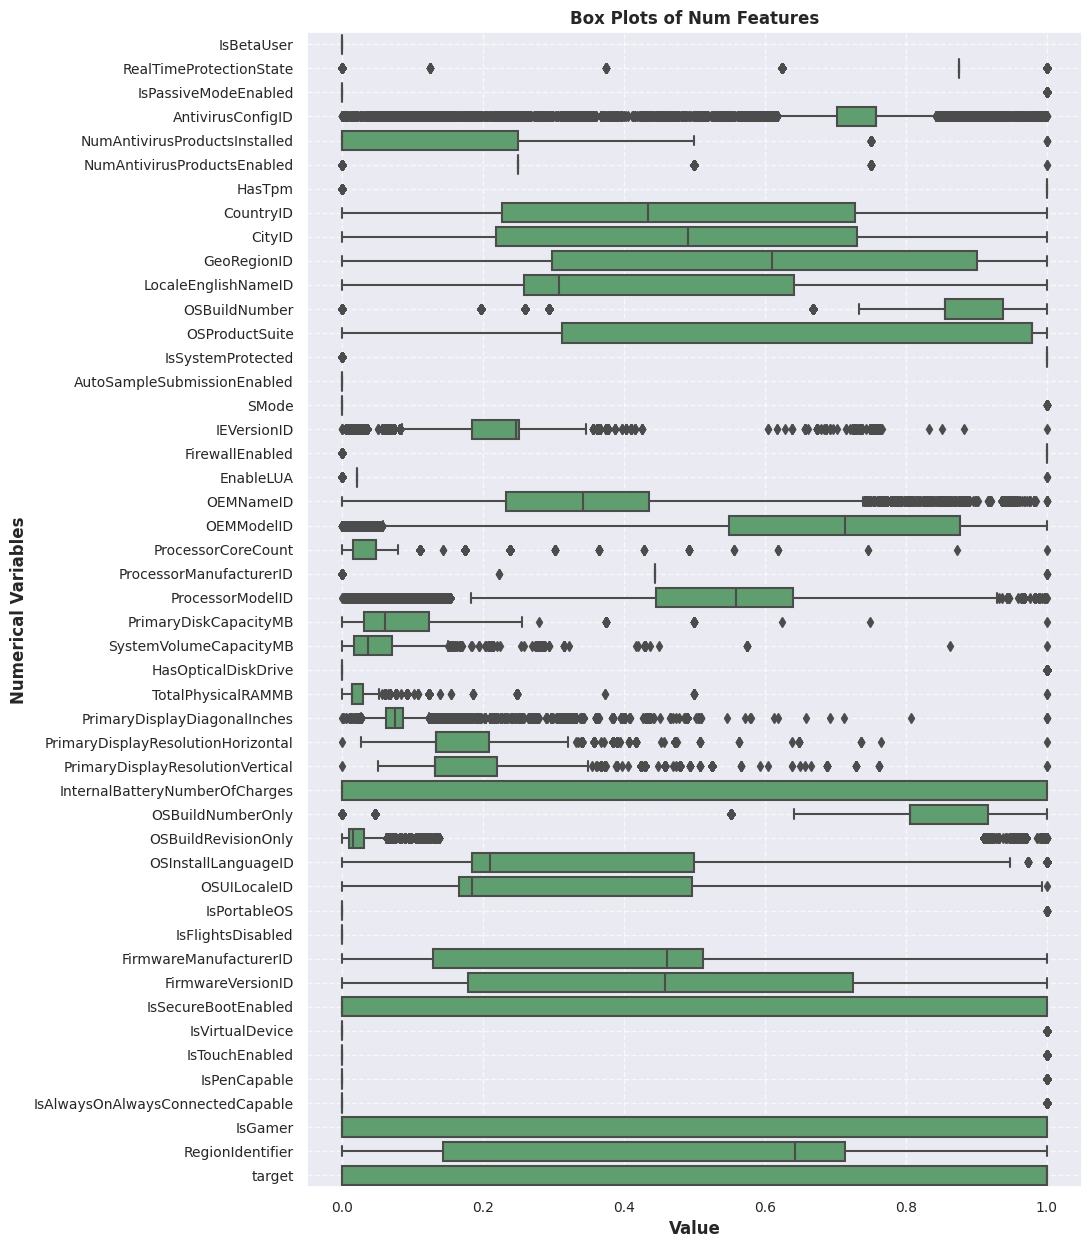

In [12]:
scaled_data = MinMaxScaler().fit_transform(train[num_cols])
scaled_df = pd.DataFrame(scaled_data, columns=num_cols)

plt.figure(figsize=(10, 15)) 
sns.boxplot(data=scaled_df, orient="h", color="g")

plt.title("Box Plots of Num Features", fontweight="bold")
plt.xlabel("Value", fontweight="bold")
plt.ylabel("Numerical Variables", fontweight="bold")

plt.yticks(ticks=range(len(num_cols)), labels=num_cols, fontsize=10)
plt.xticks(fontsize=10)

plt.grid(True, linestyle='--', alpha=0.7)

plt.show()



## **Distribution Analysis 💡**

# **Insights 💡**
### 1. It is also evident from the box plot that Features such as **AutoSampleSubmissionEnabled** , **IsBetaUser** and **IsFlightsDisabled** have the same value in the whole dataset irrespective of the Target classification. IsFlightsDisabled has some null values but it is only 0.3%. Therefore these three features are least important for our ML model.

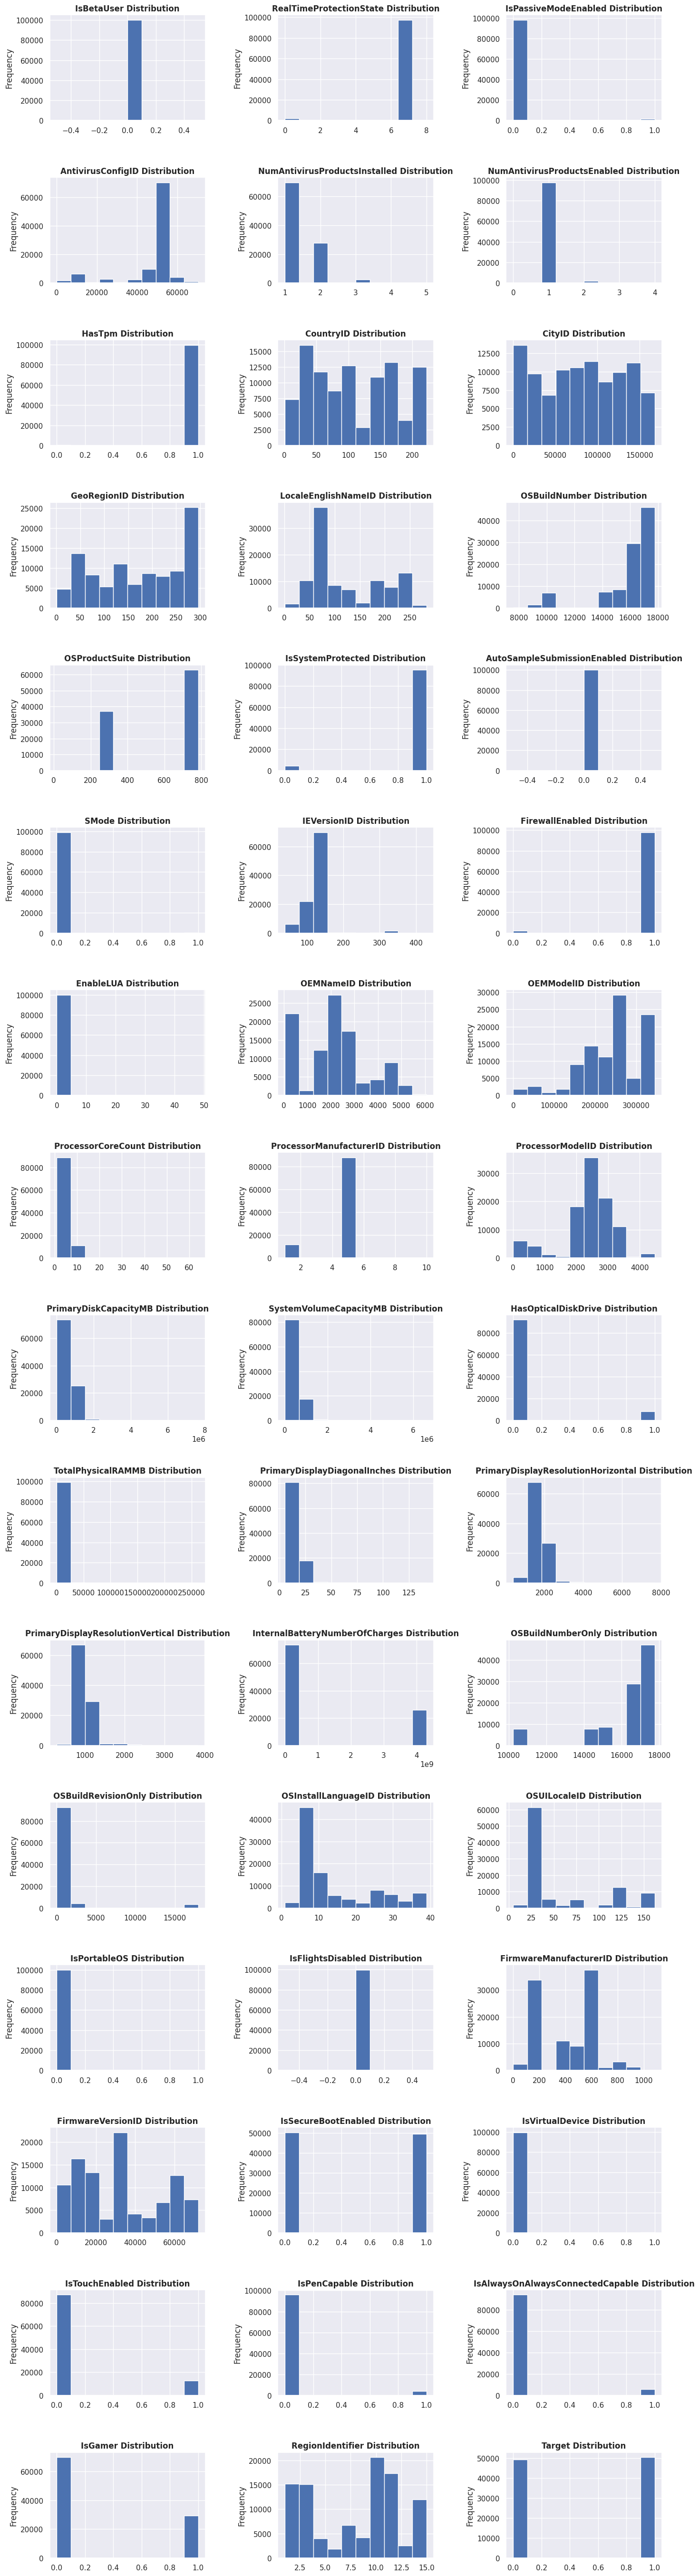

In [13]:
fig, axes = plt.subplots(16, 3, figsize=(15, 55))
for i, j in enumerate(num_cols):
    row, col = divmod(i, 3)
    train[j].plot(kind="hist", ax=axes[row, col])
    axes[row, col].set_title(f"{j[0].upper() + j[1:]} Distribution", fontweight="bold")
fig.tight_layout(pad=3.0)
plt.show()


## **Relationship of Important Features with Target 💡**
### * 💡 PC of Gamers is susceptible to threat
### * 💡 Product Suite Mask around the range ~768 has less threat affected systems than Product Suite mask around the range ~256
### * 💡 The relationship between Secure Boot enabled and the Target is balanced.
### * 💡 System is more prone to threat when the NumAntivirusProductsInstalled is 1
### * 💡 Region with ID 10 has more threat affected systems
### * 💡 OS Install Language ID when 8 shows high chance of Threat exposure.
### * 💡 System is more suceptible to threat when the number of antivirus products installed is less than 2.

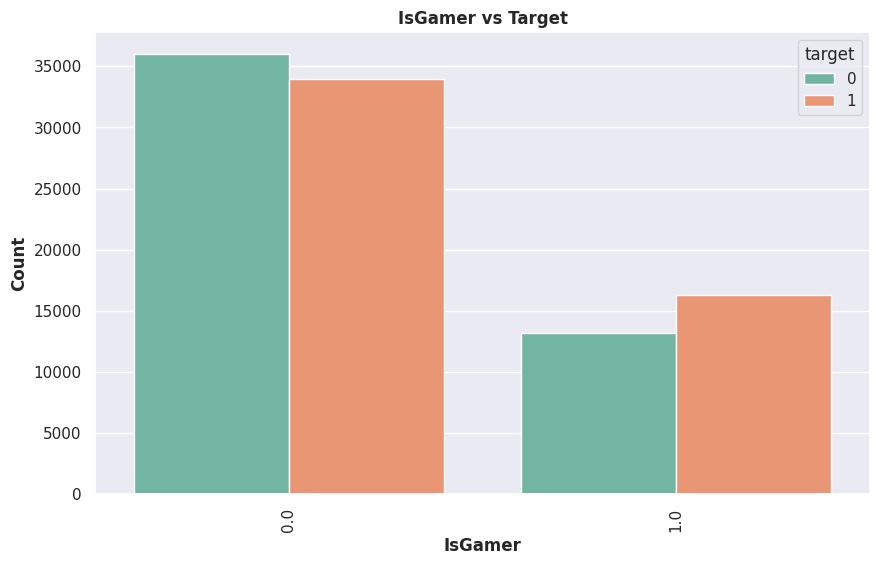

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(data=train, x='IsGamer', hue='target', palette='Set2')
plt.title('IsGamer vs Target', fontweight="bold")
plt.xlabel('IsGamer', fontweight="bold")
plt.ylabel('Count', fontweight="bold")
plt.xticks(rotation=90)
plt.show()

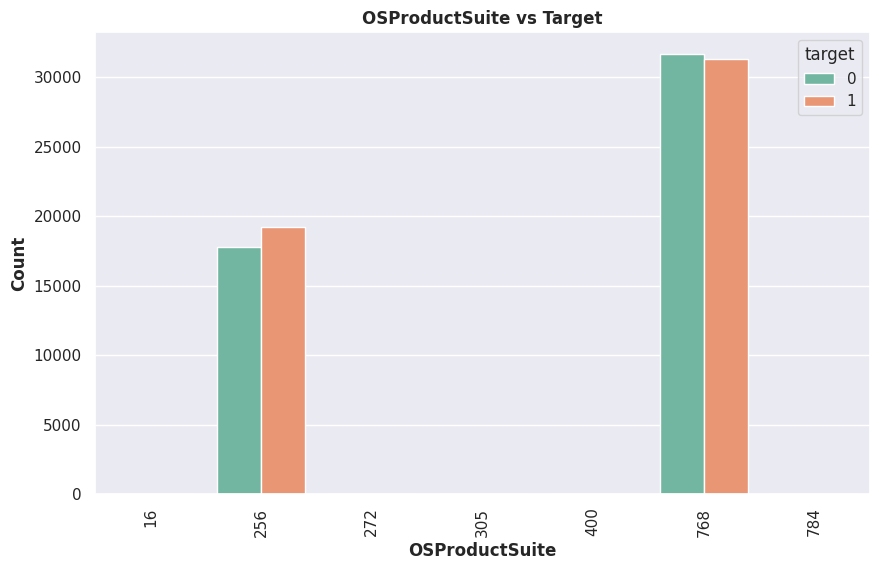

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(data=train, x='OSProductSuite', hue='target', palette='Set2')
plt.title('OSProductSuite vs Target', fontweight="bold")
plt.xlabel('OSProductSuite', fontweight="bold")
plt.ylabel('Count', fontweight="bold")
plt.xticks(rotation=90)
plt.show()

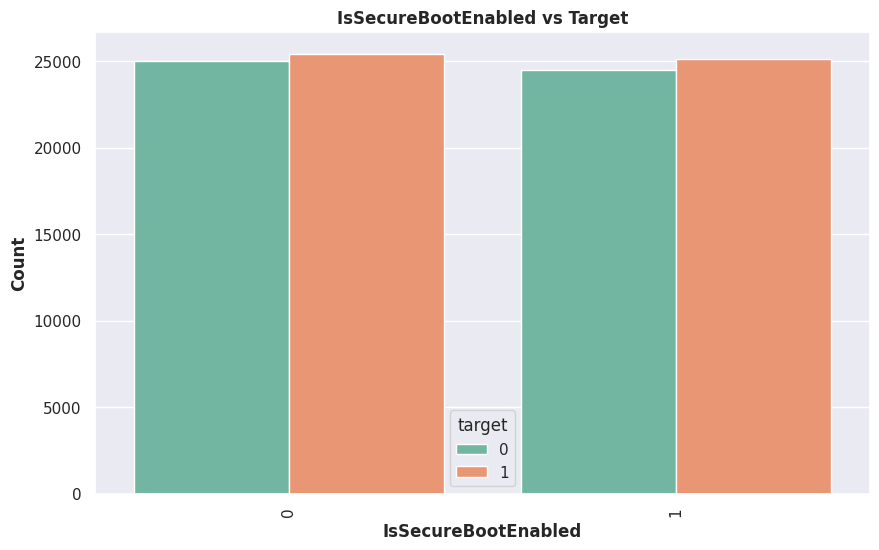

In [16]:

plt.figure(figsize=(10, 6))
sns.countplot(data=train, x='IsSecureBootEnabled', hue='target', palette='Set2')
plt.title('IsSecureBootEnabled vs Target', fontweight="bold")
plt.xlabel('IsSecureBootEnabled', fontweight="bold")
plt.ylabel('Count', fontweight="bold")
plt.xticks(rotation=90)
plt.show()

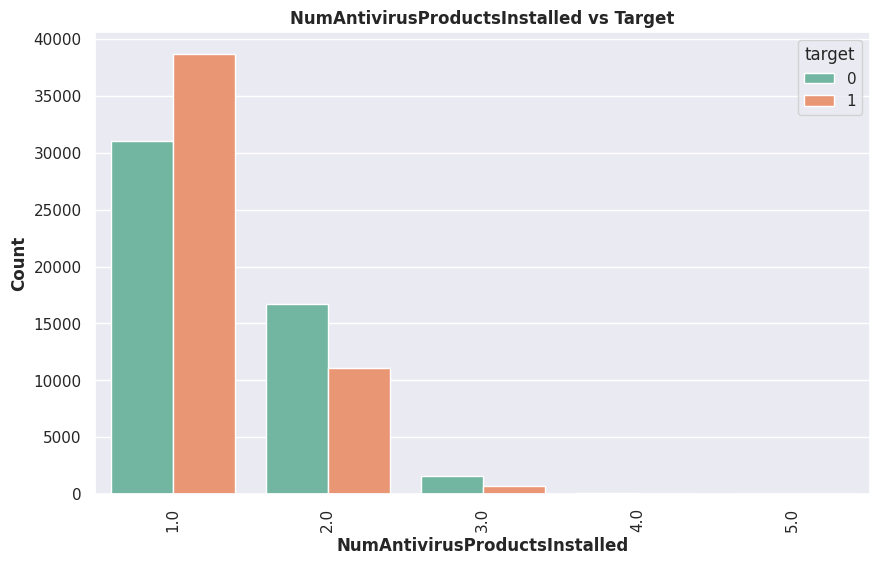

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(data=train, x='NumAntivirusProductsInstalled', hue='target', palette='Set2')
plt.title('NumAntivirusProductsInstalled vs Target', fontweight="bold")
plt.xlabel('NumAntivirusProductsInstalled', fontweight="bold")
plt.ylabel('Count', fontweight="bold")
plt.xticks(rotation=90)
plt.show()

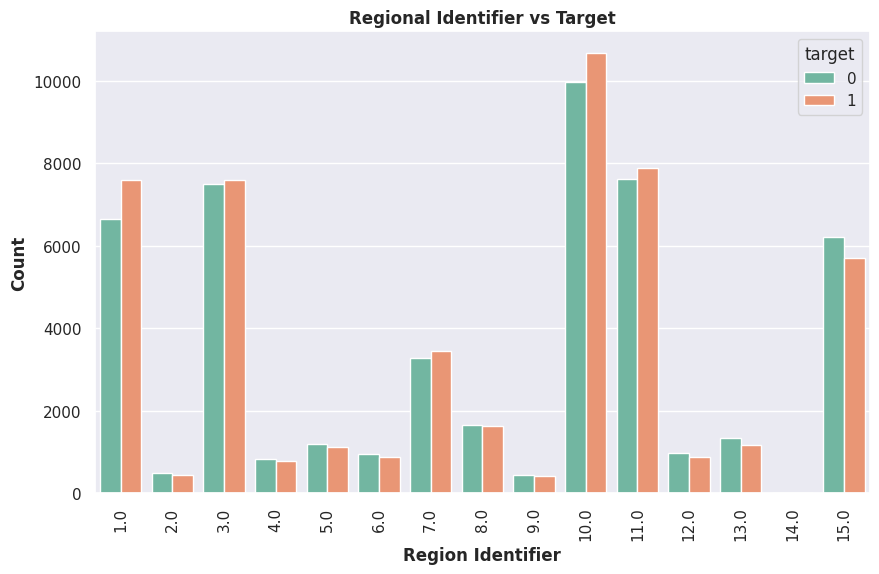

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(data=train, x='RegionIdentifier', hue='target', palette='Set2')
plt.title('Regional Identifier vs Target', fontweight="bold")
plt.xlabel('Region Identifier', fontweight="bold")
plt.ylabel('Count', fontweight="bold")
plt.xticks(rotation=90)
plt.show()

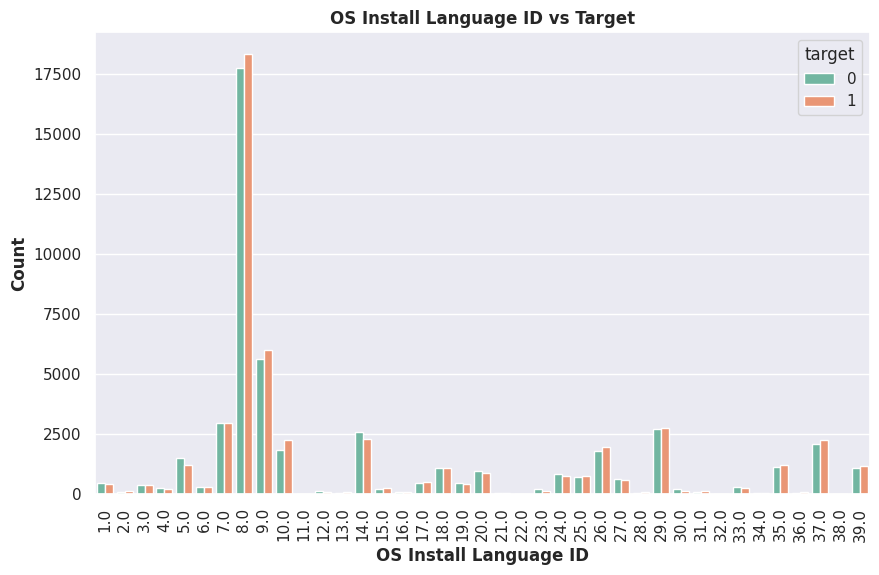

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(data=train, x='OSInstallLanguageID', hue='target', palette='Set2')
plt.title('OS Install Language ID vs Target', fontweight="bold")
plt.xlabel('OS Install Language ID', fontweight="bold")
plt.ylabel('Count', fontweight="bold")
plt.xticks(rotation=90)
plt.show()

## **Correlation Matrix 💡**

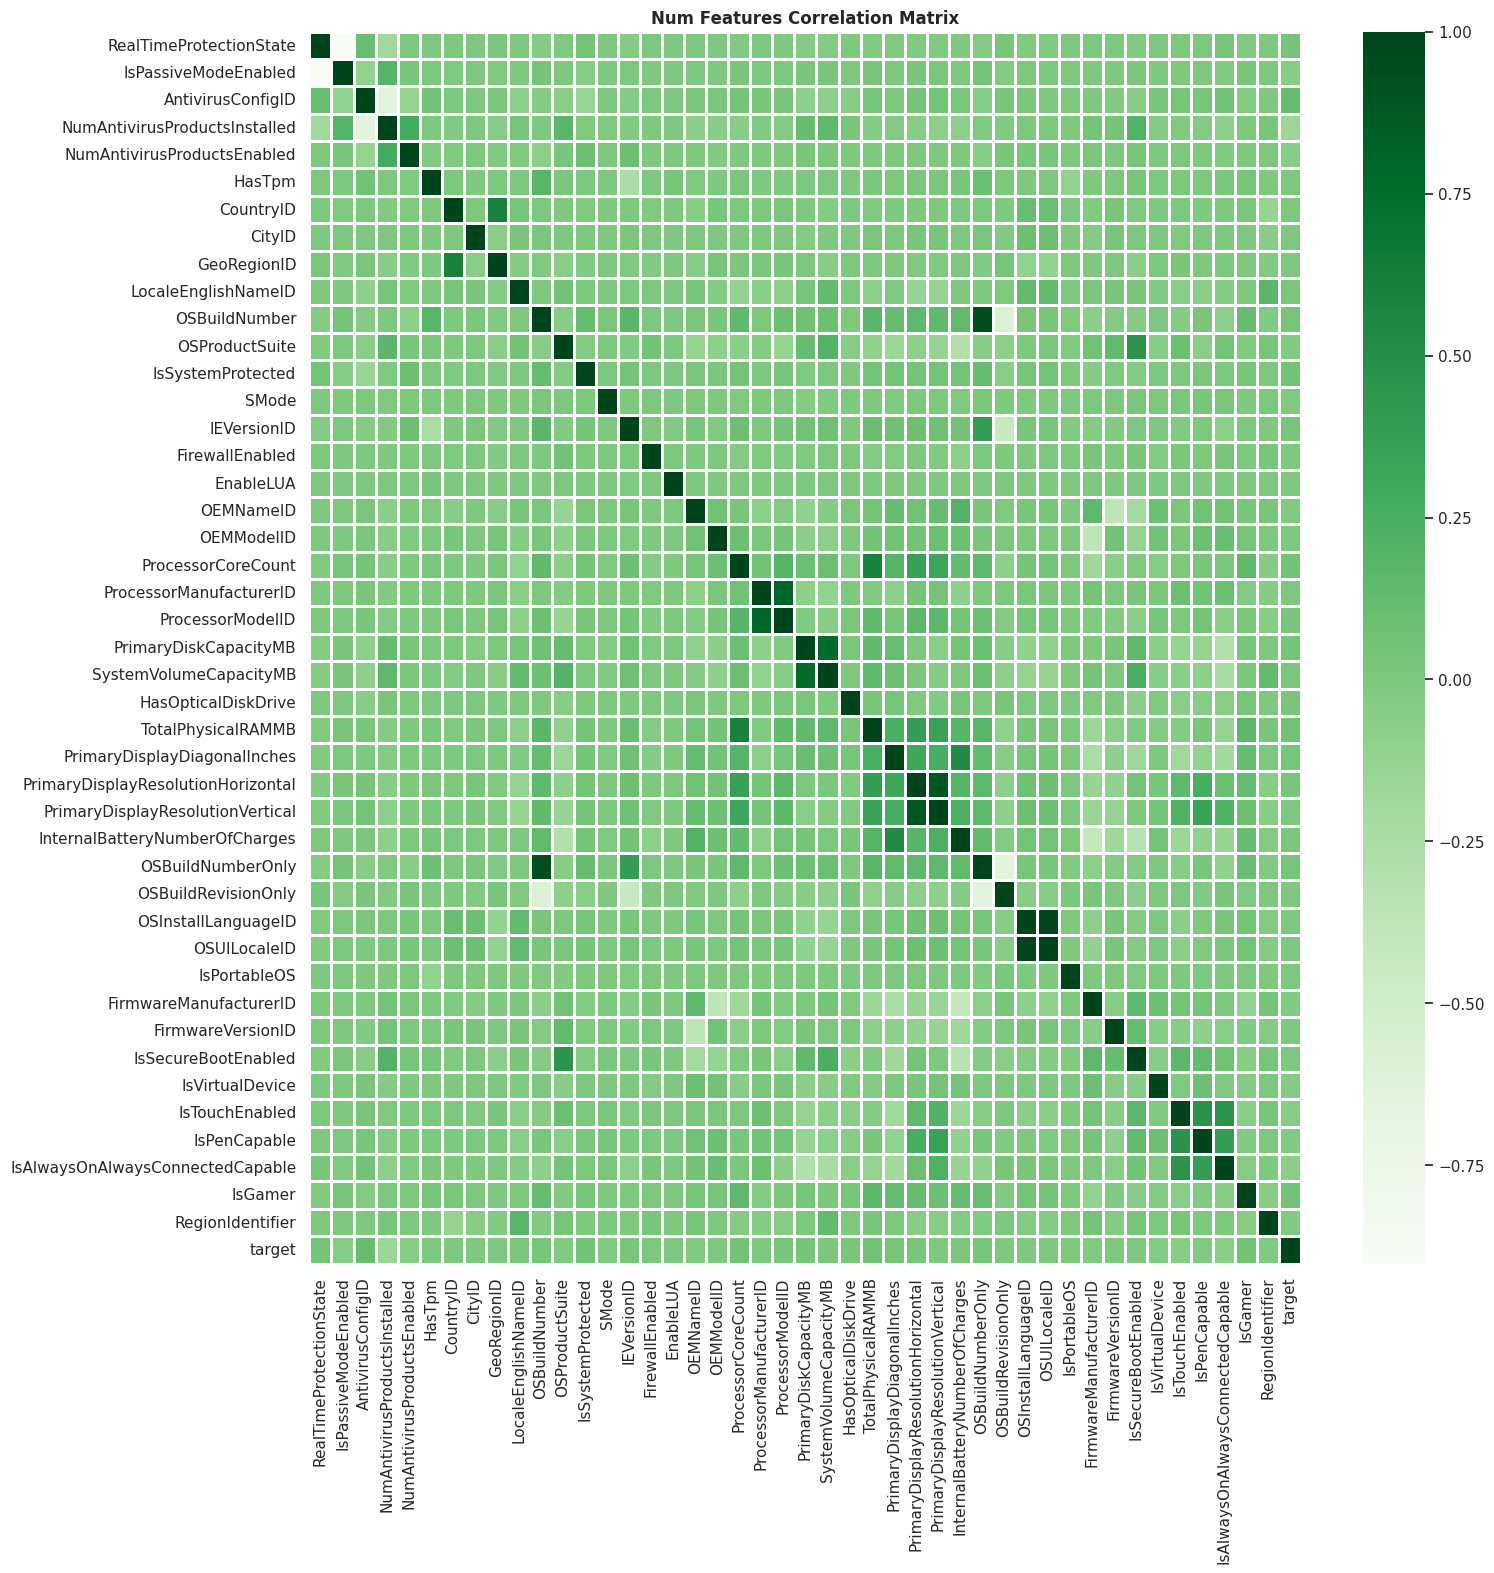

In [20]:
# Remove 'IsFlightsDisabled', 'IsBetaUser', and 'AutoSampleSubmissionEnabled' from the list of numerical columns
num_cols_temp = [col for col in num_cols if col not in ['IsFlightsDisabled', 'IsBetaUser', 'AutoSampleSubmissionEnabled']]

# Plot the correlation matrix
plt.figure(figsize=(16, 16))
sns.heatmap(train[num_cols_temp].corr(), cmap="Greens", annot=False, linecolor="white", linewidths=1)
plt.title("Num Features Correlation Matrix", fontweight="bold")
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()


In [21]:
corr_matrix = train[num_cols_temp].corr()
strong_corr_pairs = [(row, col, corr_matrix.loc[row, col]) 
                     for row in corr_matrix.index 
                     for col in corr_matrix.columns 
                     if corr_matrix.loc[row, col] >= 0.5 and row != col]

print("Strong Correlations (above threshold):")
for pair in strong_corr_pairs:
    print(f"{pair[0]} vs {pair[1]}: {pair[2]:.2f}")

Strong Correlations (above threshold):
CountryID vs GeoRegionID: 0.60
GeoRegionID vs CountryID: 0.60
OSBuildNumber vs OSBuildNumberOnly: 0.95
ProcessorCoreCount vs TotalPhysicalRAMMB: 0.59
ProcessorManufacturerID vs ProcessorModelID: 0.80
ProcessorModelID vs ProcessorManufacturerID: 0.80
PrimaryDiskCapacityMB vs SystemVolumeCapacityMB: 0.77
SystemVolumeCapacityMB vs PrimaryDiskCapacityMB: 0.77
TotalPhysicalRAMMB vs ProcessorCoreCount: 0.59
PrimaryDisplayDiagonalInches vs InternalBatteryNumberOfCharges: 0.53
PrimaryDisplayResolutionHorizontal vs PrimaryDisplayResolutionVertical: 0.90
PrimaryDisplayResolutionVertical vs PrimaryDisplayResolutionHorizontal: 0.90
InternalBatteryNumberOfCharges vs PrimaryDisplayDiagonalInches: 0.53
OSBuildNumberOnly vs OSBuildNumber: 0.95
OSInstallLanguageID vs OSUILocaleID: 0.99
OSUILocaleID vs OSInstallLanguageID: 0.99


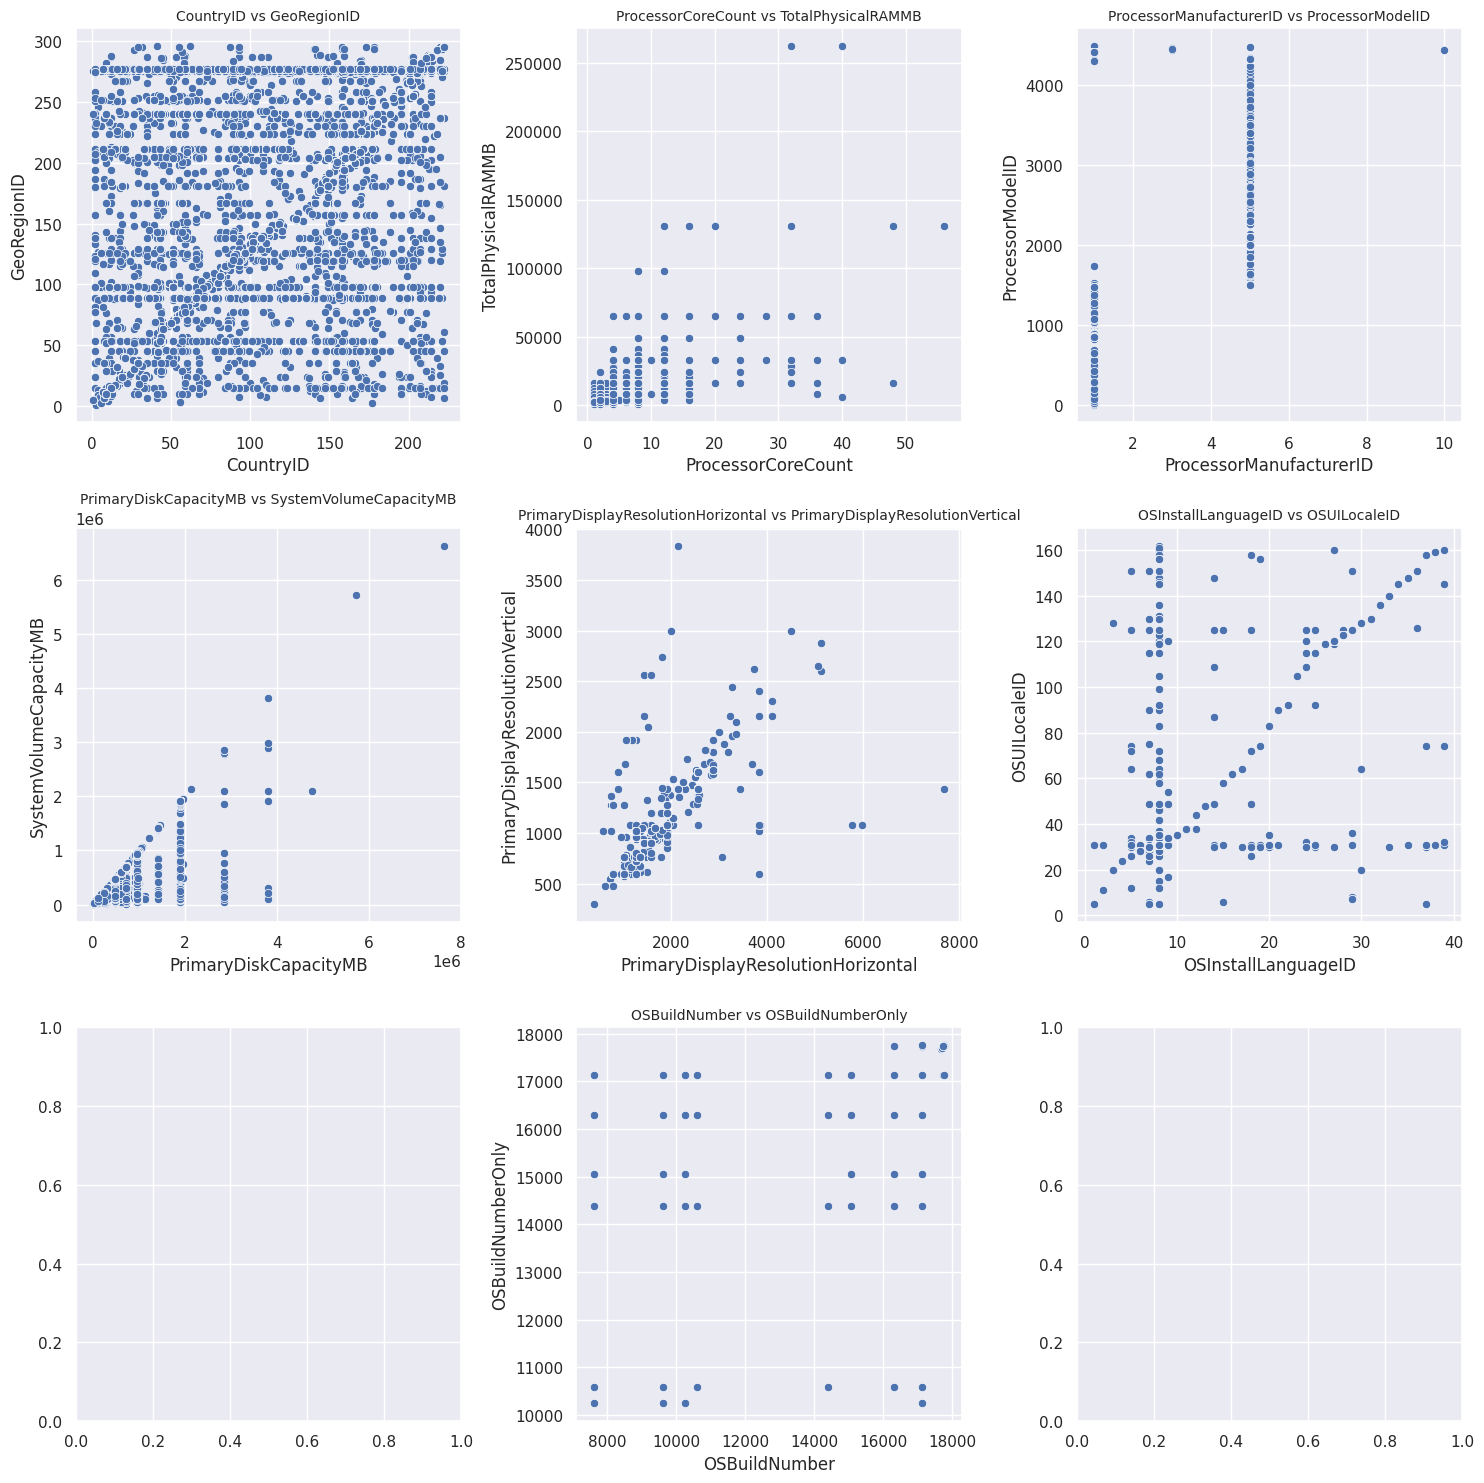

In [22]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

sns.scatterplot(x=train['CountryID'], y=train['GeoRegionID'], ax=axes[0, 0])
axes[0, 0].set_title('CountryID vs GeoRegionID', fontsize=10)

sns.scatterplot(x=train['ProcessorCoreCount'], y=train['TotalPhysicalRAMMB'], ax=axes[0, 1])
axes[0, 1].set_title('ProcessorCoreCount vs TotalPhysicalRAMMB', fontsize=10)

sns.scatterplot(x=train['ProcessorManufacturerID'], y=train['ProcessorModelID'], ax=axes[0, 2])
axes[0, 2].set_title('ProcessorManufacturerID vs ProcessorModelID', fontsize=10)

sns.scatterplot(x=train['PrimaryDiskCapacityMB'], y=train['SystemVolumeCapacityMB'], ax=axes[1, 0])
axes[1, 0].set_title('PrimaryDiskCapacityMB vs SystemVolumeCapacityMB', fontsize=10)

sns.scatterplot(x=train['PrimaryDisplayResolutionHorizontal'], y=train['PrimaryDisplayResolutionVertical'], ax=axes[1, 1])
axes[1, 1].set_title('PrimaryDisplayResolutionHorizontal vs PrimaryDisplayResolutionVertical', fontsize=10)

sns.scatterplot(x=train['OSInstallLanguageID'], y=train['OSUILocaleID'], ax=axes[1, 2])
axes[1, 2].set_title('OSInstallLanguageID vs OSUILocaleID', fontsize=10)

sns.scatterplot(x=train['OSBuildNumber'], y=train['OSBuildNumberOnly'], ax=axes[2, 1])
axes[2, 1].set_title('OSBuildNumber vs OSBuildNumberOnly', fontsize=10)

plt.tight_layout()

# Show the plot
plt.show()


## **Correlation of Numerical Features with Target**

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


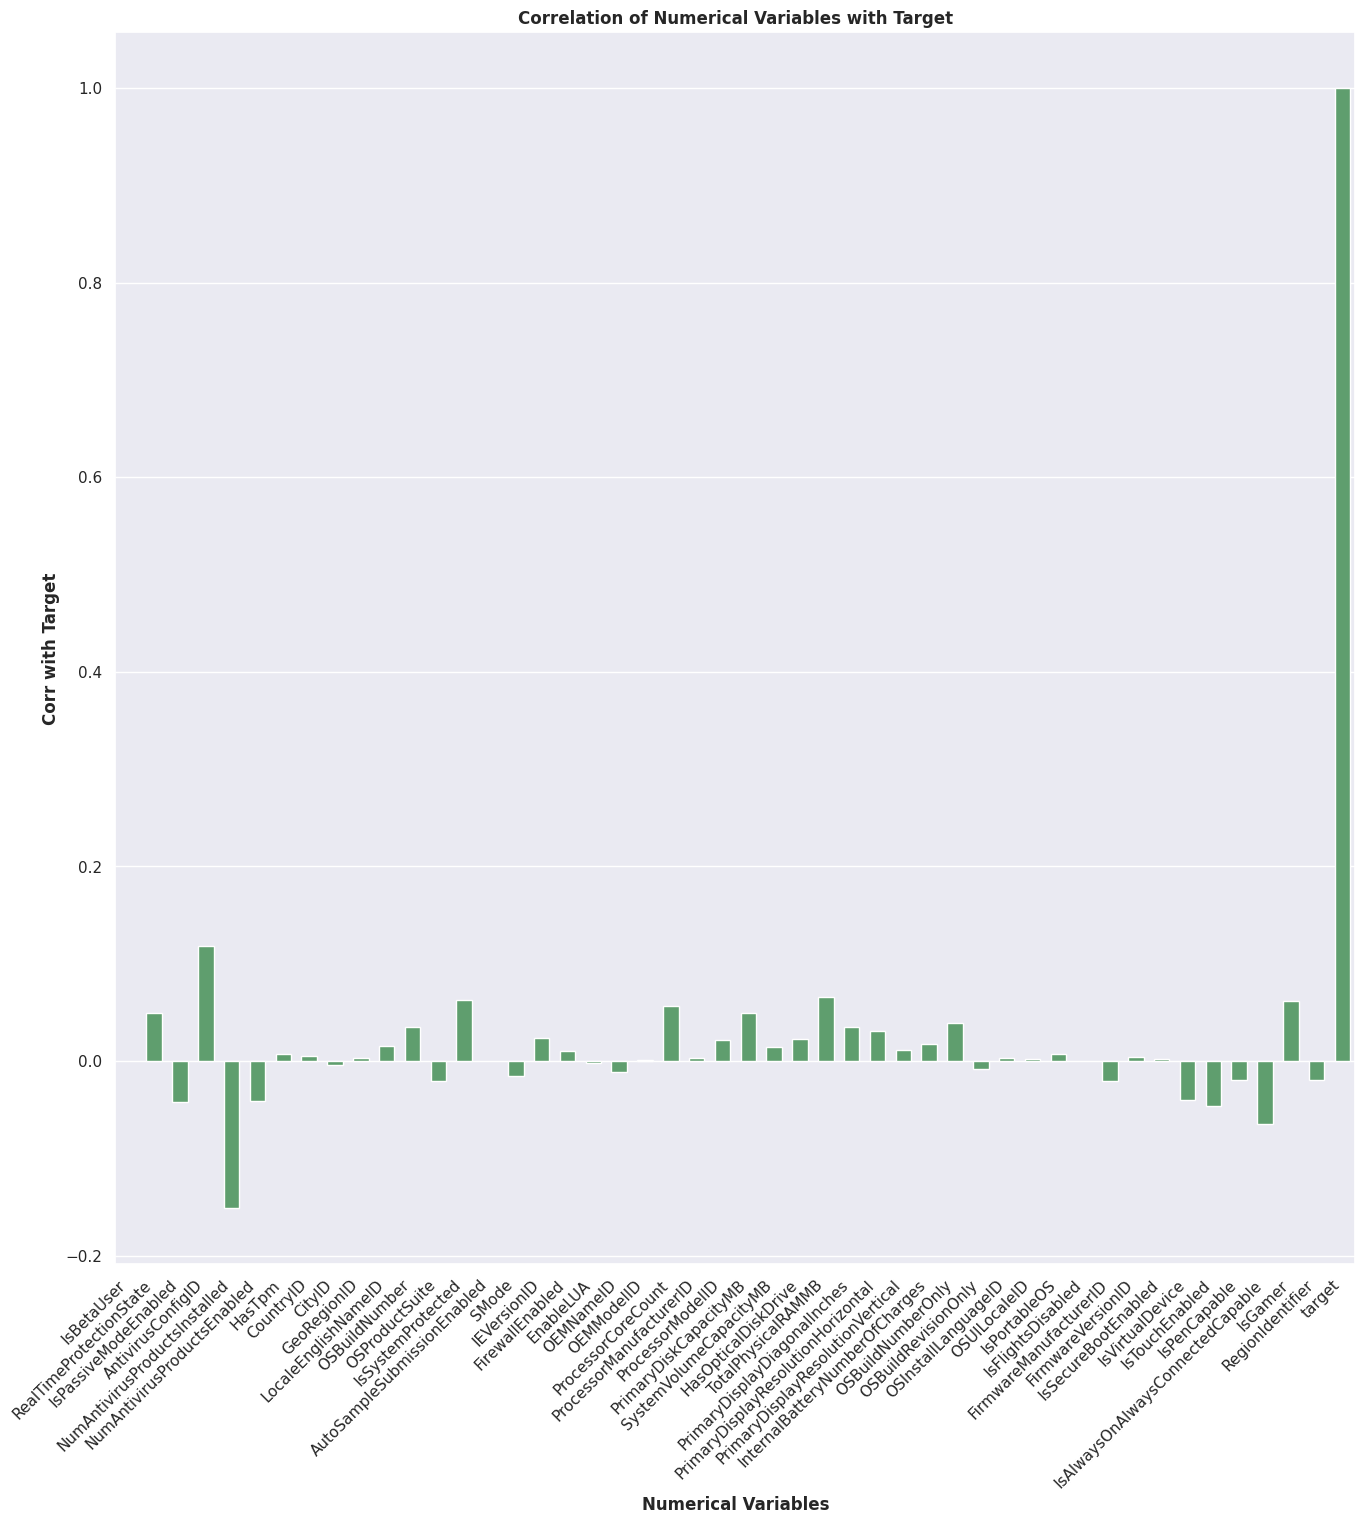

In [23]:
targets = train['target']
plt.figure(figsize=(16,16))
target_corr = [train[col].corr(targets) for col in num_cols]
sns.barplot(x=num_cols, y=target_corr, color="g", width=0.6)
plt.title("Correlation of Numerical Variables with Target", fontweight="bold")
plt.xlabel("Numerical Variables", fontweight="bold")
plt.ylabel("Corr with Target", fontweight="bold")
plt.xticks(rotation=45, ha="right")
plt.show()


# **Categorical Features Analysis**
## 1. MachineID has 99835 unique values. This feature contributes less to our ML model as the distinct values lead to a very low correlation coefficient with Target.
## 2. Since the cardinality of the categorical features vary from 2 to 99835 , I chose to analyze the categorical columns based on cardinality

In [24]:
print("\nCount of Unique Categories in Each Categorical Column:")
unique_counts = train[cat_cols].nunique().sort_values(ascending=False)
print(unique_counts)



Count of Unique Categories in Each Categorical Column:
MachineID                   99835
SignatureVersion             2735
DateAS                       2695
OSBuildLab                    281
NumericOSVersion              221
DateOS                        112
AppVersion                     69
EngineVersion                  37
ChassisType                    28
OSEdition                      20
OSSkuFriendlyName              18
OSBranch                       13
MDC2FormFactor                 11
OSInstallType                   9
PowerPlatformRole               9
OsPlatformSubRelease            9
SKUEditionName                  8
FlightRing                      7
OSVersion                       7
LicenseActivationChannel        6
AutoUpdateOptionsName           6
PrimaryDiskType                 4
PlatformType                    4
OSGenuineState                  4
Processor                       3
OSArchitecture                  3
ProductName                     2
DeviceFamily              

# **Cardinality Analysis 💡**
### 1. Low Cardinality : Less than 10 unique values / categories
### 2. Medium Cardinality :  Between 11 to 50 unique values / categories
### 3. High Cardinality : More than 50 unique values / categories

In [25]:
low_cardinality = [col for col in cat_cols if train[col].nunique() <= 10]
medium_cardinality = [col for col in cat_cols if 11 <= train[col].nunique() <= 50]
high_cardinality = [col for col in cat_cols if train[col].nunique() > 50]
print('Low:',low_cardinality)
print('Medium:',medium_cardinality)
print('High',high_cardinality)

Low: ['ProductName', 'PlatformType', 'Processor', 'OSVersion', 'OsPlatformSubRelease', 'SKUEditionName', 'DeviceFamily', 'PrimaryDiskType', 'PowerPlatformRole', 'OSArchitecture', 'OSInstallType', 'AutoUpdateOptionsName', 'OSGenuineState', 'LicenseActivationChannel', 'FlightRing']
Medium: ['EngineVersion', 'MDC2FormFactor', 'ChassisType', 'OSBranch', 'OSEdition', 'OSSkuFriendlyName']
High ['MachineID', 'AppVersion', 'SignatureVersion', 'OSBuildLab', 'NumericOSVersion', 'DateAS', 'DateOS']


# **Low Cardinality Features Analysis**

### 1. The most common platform type (OS) is windows 10.
### 2. More than 50% of the systems use a x64 procesor.
### 3. The most common OS version is 10.0.0.0
### 4. The amd64 architecture overwhelmingly dominates, with x86 and arm64 having minimal presence.
### 5. HDD is the most common disk type, followed by a notable presence of 'Unspecified' and 'UNKNOWN' entries. SSD usage is relatively lower.

### Conclusion:Most features show a fairly balanced distribution between the two target classes (0 and 1), suggesting no significant class imbalance across these categorical variables

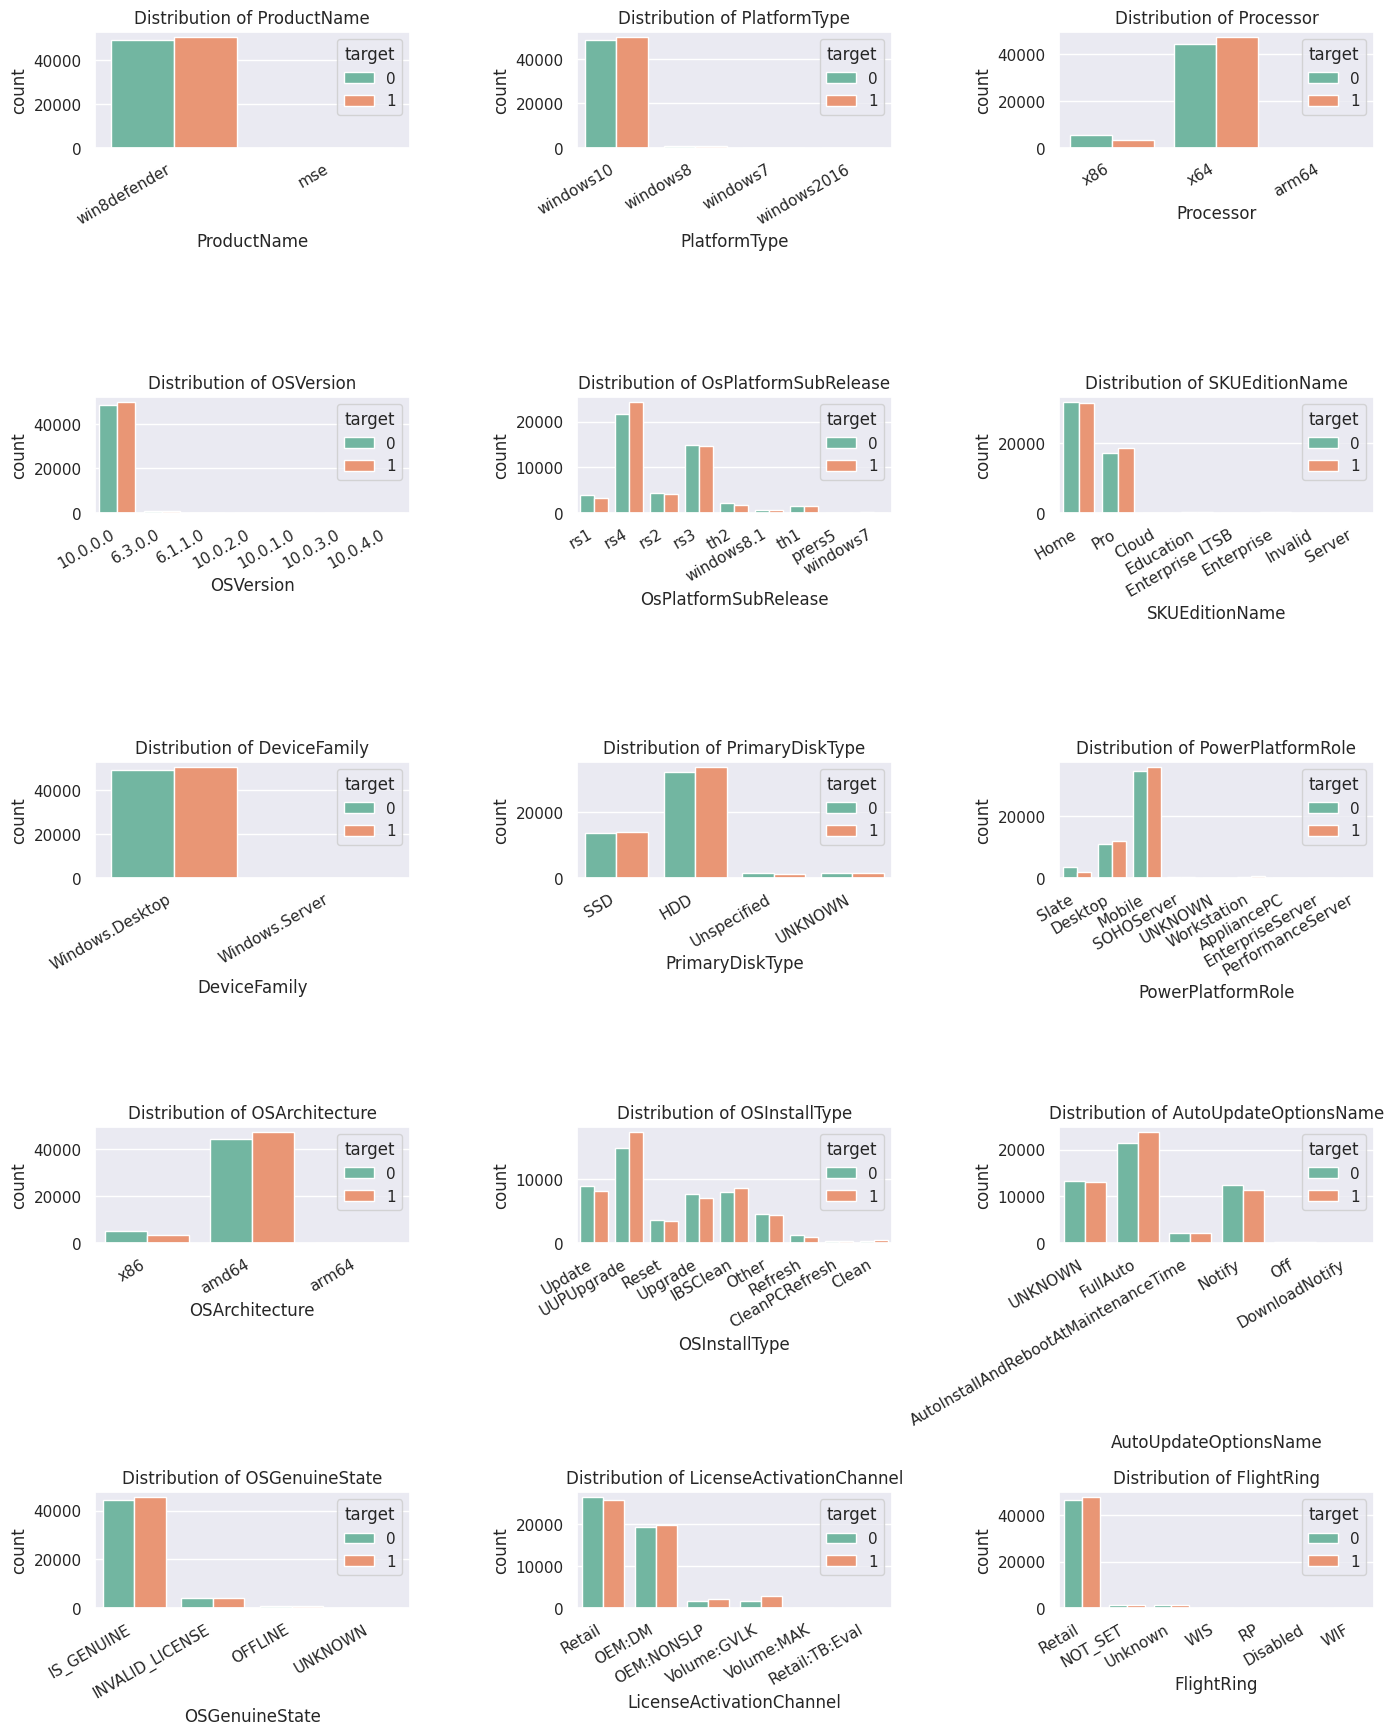

In [26]:
plt.figure(figsize=(14, 20)) 
for i, col in enumerate(low_cardinality):
    plt.subplot(6, 3, i + 1)
    sns.countplot(data=train, x=col, hue='target', palette='Set2')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()


## **Low Cardinality - Correlation with Target 💡**

### 1. Powerplatform role and processor show a strong positive correlation with Target variable.
### 2. Product name and device family show a weak correlation coefficient with Target variable.

# **Chi-Square test**

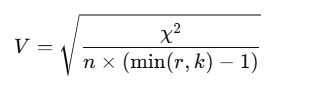

Where:

𝜒
2
  = Chi-squared statistic

n = Total sample size


r = Number of rows


k = Number of columns

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


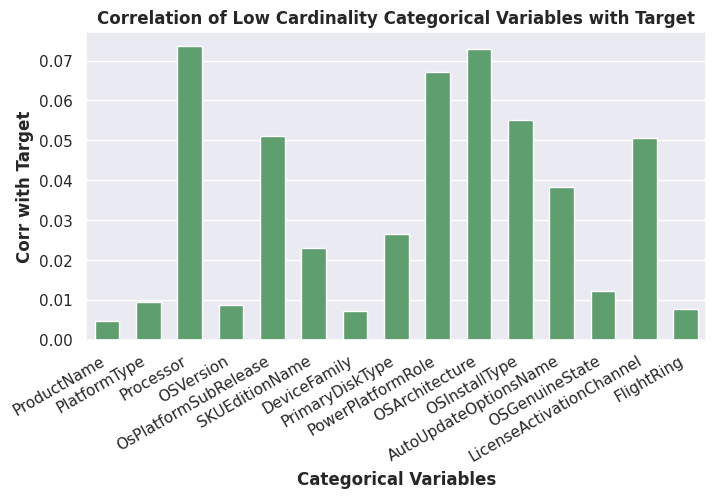

In [27]:
plt.figure(figsize=(8,4))
from scipy.stats import chi2_contingency

def cramer_v(x, y):
    contingency_table = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    r, k = contingency_table.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

association_low = [cramer_v(train[i],train["target"]) for i in low_cardinality]
sns.barplot(x=low_cardinality, y=association_low, color="g", width=0.6)
plt.title("Correlation of Low Cardinality Categorical Variables with Target", fontweight="bold")
plt.xlabel("Categorical Variables", fontweight="bold")
plt.ylabel("Corr with Target", fontweight="bold")
plt.xticks(rotation=30, ha='right')
plt.show()


# **Medium Cardinality Features**

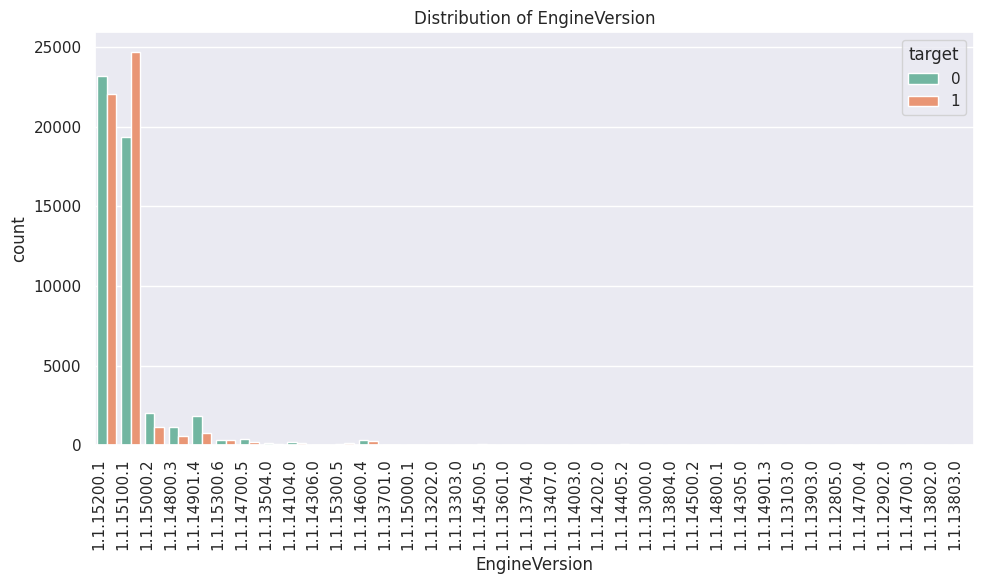

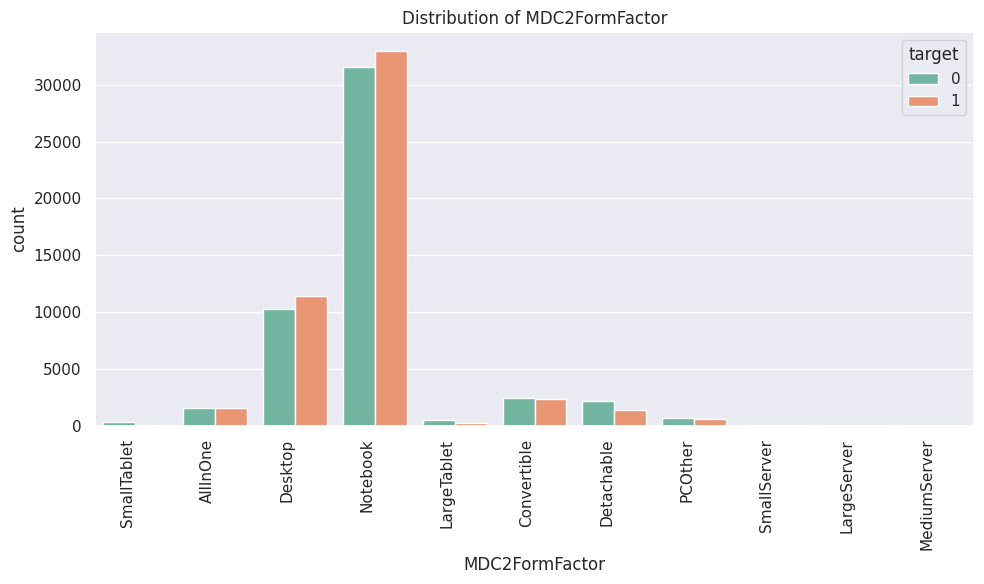

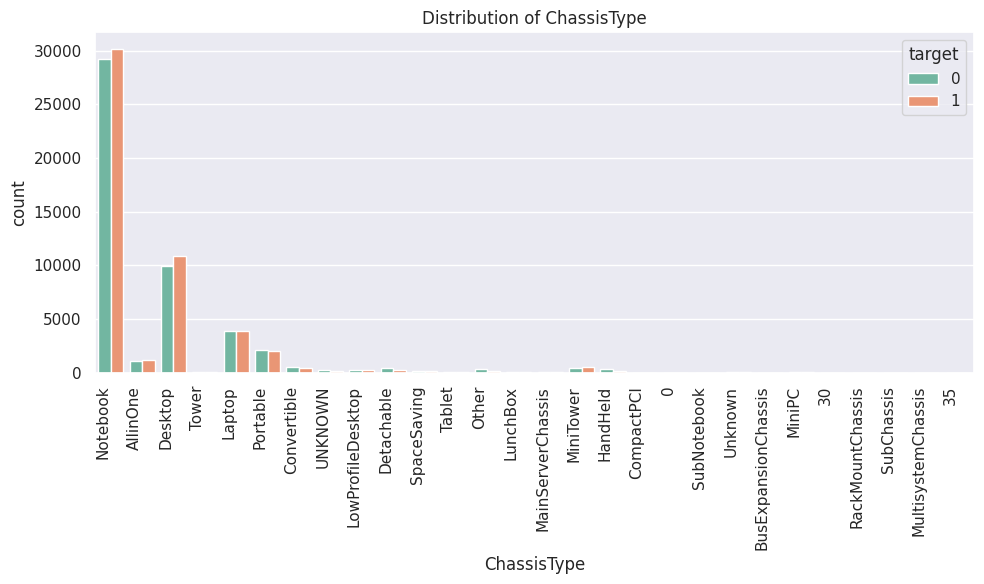

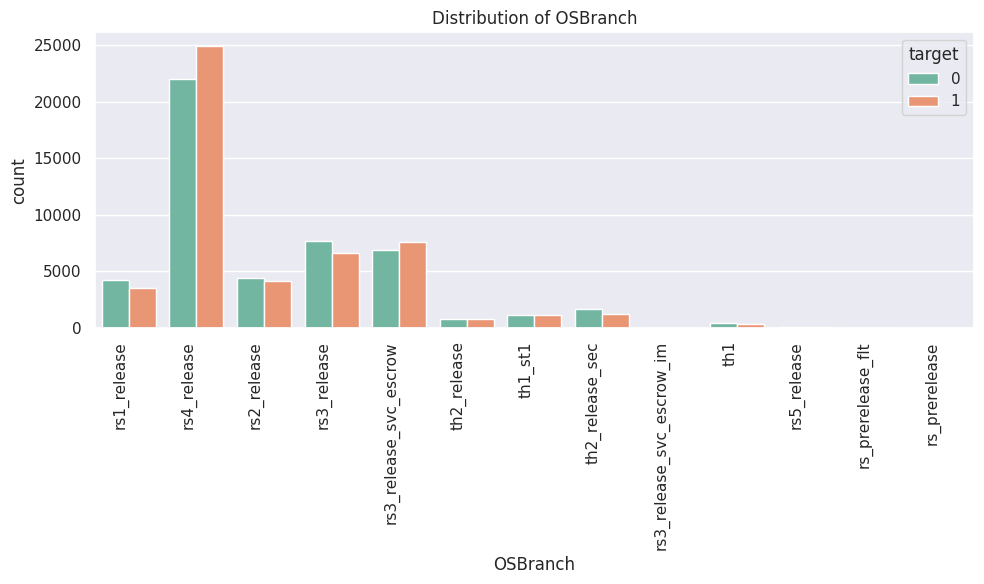

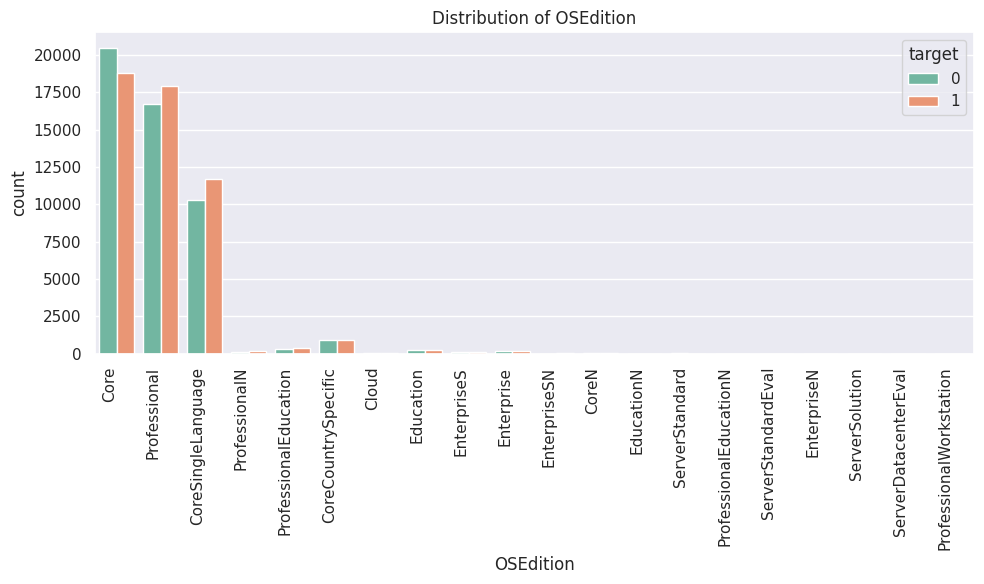

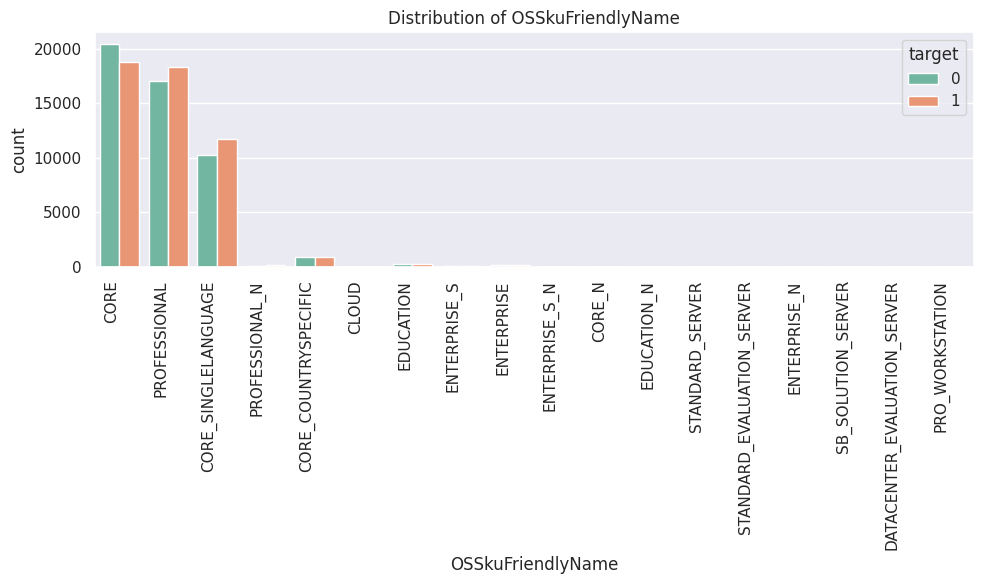

In [28]:
for col in medium_cardinality:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=train, x=col, hue='target', palette='Set2')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=90, ha='right')
    plt.tight_layout()
    plt.show()


## **Medium Cardinality - Correlation with Target 💡**

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


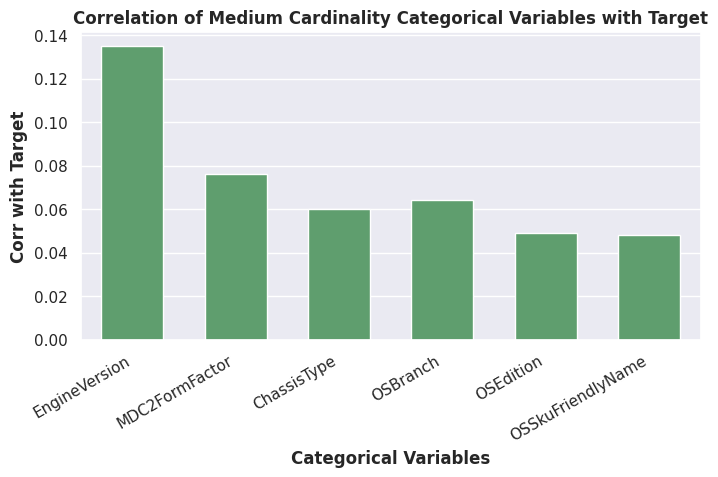

In [29]:
plt.figure(figsize=(8,4))
from scipy.stats import chi2_contingency

def cramer_v(x, y):
    contingency_table = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    r, k = contingency_table.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

association_medium = [cramer_v(train[i],train["target"]) for i in medium_cardinality]
sns.barplot(x=medium_cardinality, y=association_medium, color="g", width=0.6)
plt.title("Correlation of Medium Cardinality Categorical Variables with Target", fontweight="bold")
plt.xlabel("Categorical Variables", fontweight="bold")
plt.ylabel("Corr with Target", fontweight="bold")
plt.xticks(rotation=30, ha='right')
plt.show()


# **High Cardinality Features**

### 1. The High Cardinality features are ['MachineID', 'AppVersion', 'SignatureVersion', 'OSBuildLab', 'NumericOSVersion', 'DateAS', 'DateOS']
### 2. AppVersion , SignatureVersion and NumericOSVersion have 69,2735 and 221 unique values respectively. Since the number of categories are more, we can observe the most commonly occuring category and their counts.
### 3. DateAS and DateOS are in the dd-mm-yyyy format. Therefore we can extract the dd,mm and yyyy seperately. For EDA analyzing this data was not interesting.
### 4. MachineID has 99835 unique values which covers almost 99.8% of the whole dataset. This feature should not influence the Target variable.
### 5. OSBuildLab has 281 unique values.Similar to Version based features here too we can observe the most commonly occuring category and their counts.

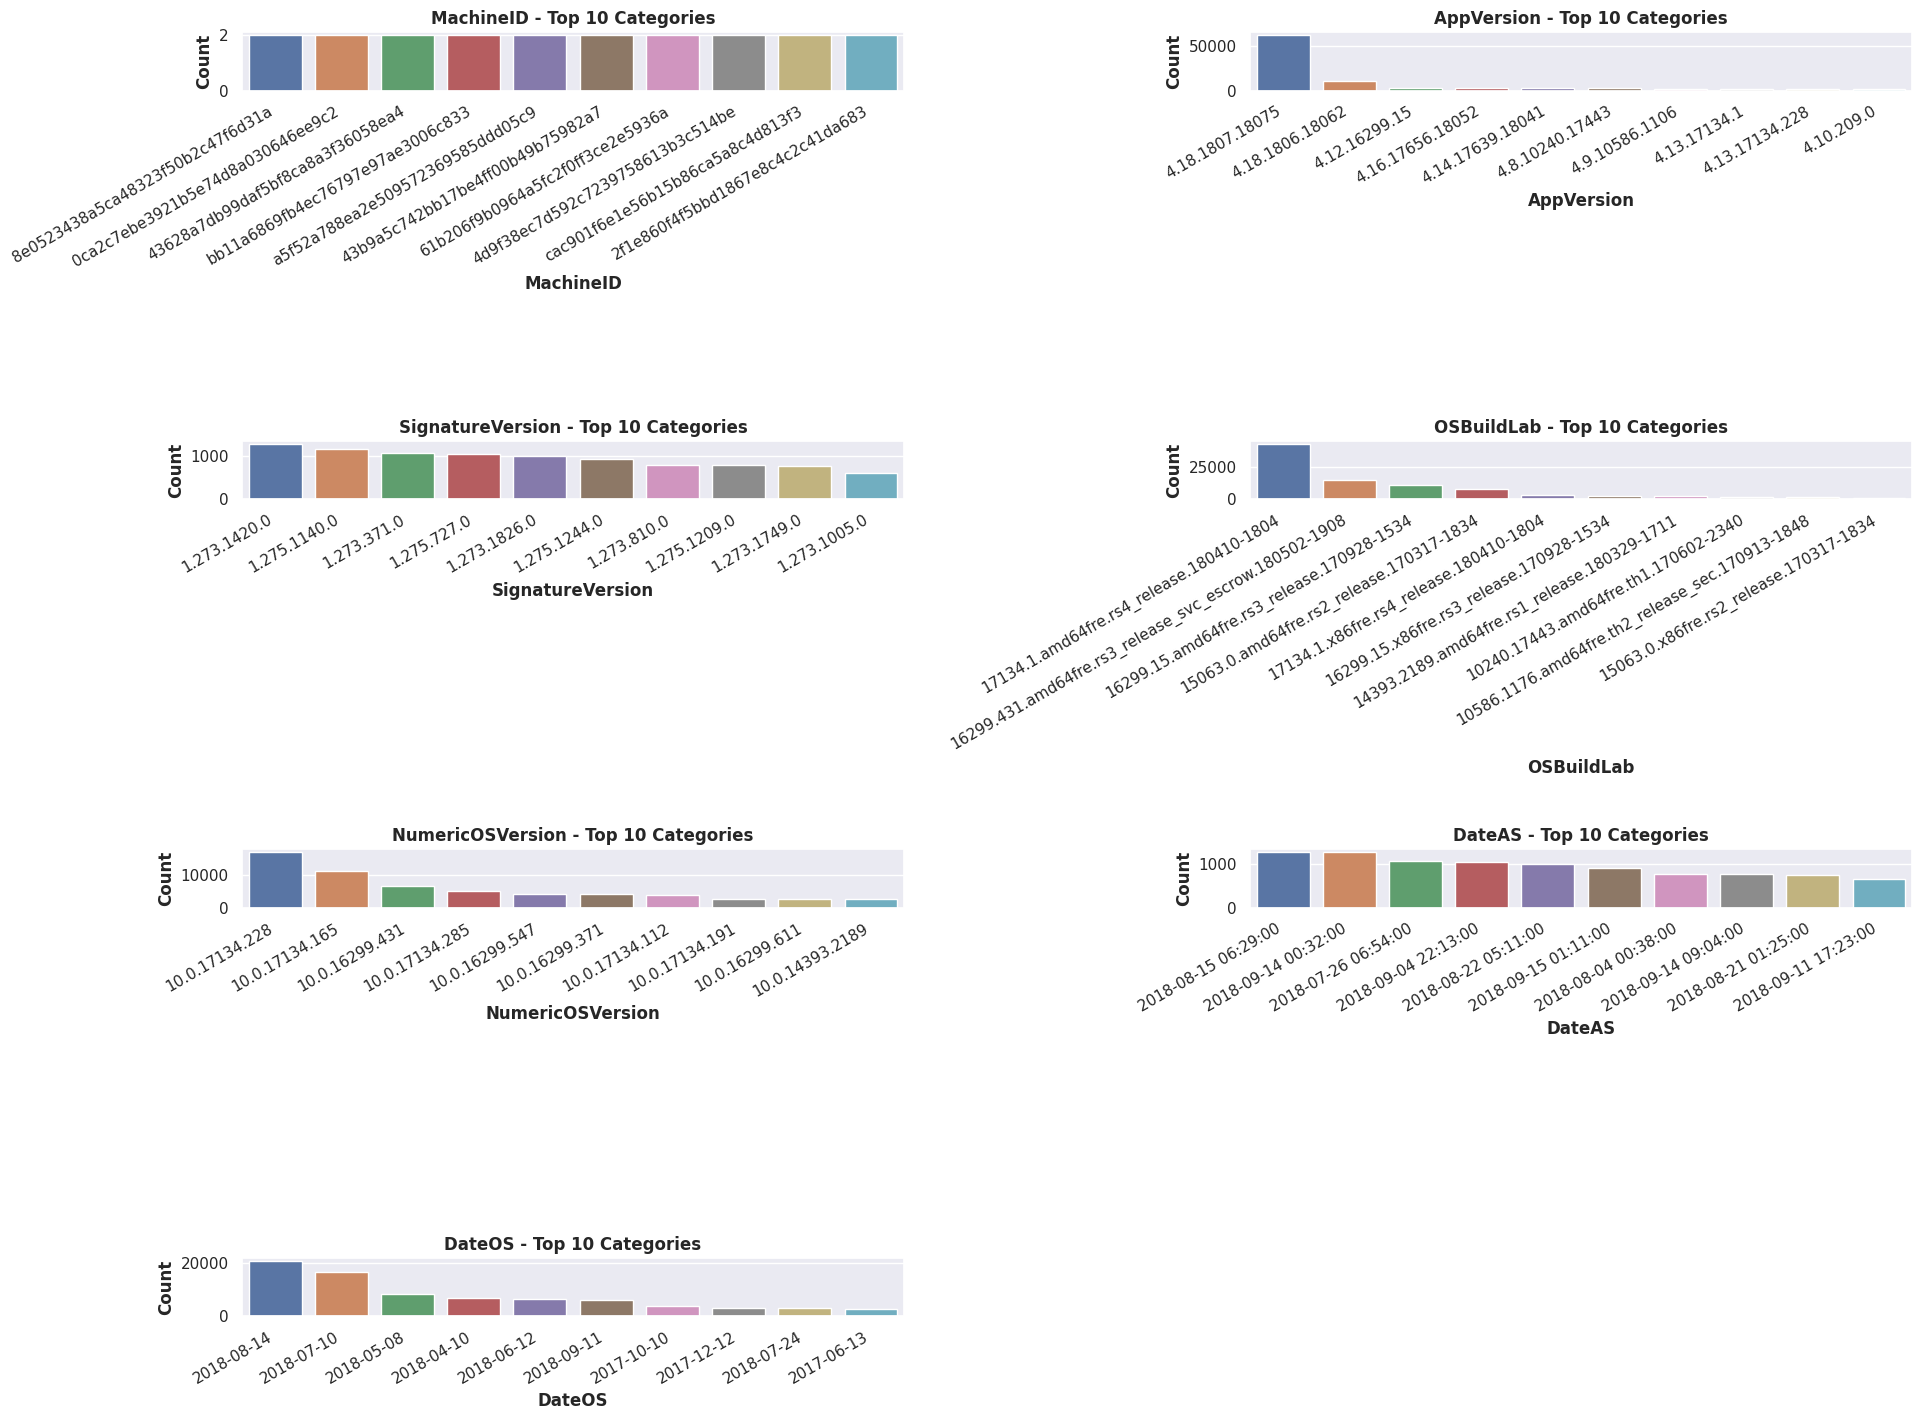

In [30]:
plt.figure(figsize=(20, 15))

num_features = len(high_cardinality)
num_rows = (num_features + 1) // 2

for i, col in enumerate(high_cardinality):
    row, col_idx = divmod(i, 2)
    plt.subplot(num_rows, 2, i + 1)
    sns.countplot(data=train, x=col, order=train[col].value_counts().index[:10])  
    plt.title(f'{col} - Top 10 Categories', fontweight="bold")
    plt.xlabel(col, fontweight="bold")
    plt.ylabel('Count', fontweight="bold")
    plt.xticks(rotation=30, ha='right')  

plt.tight_layout(pad=3.0)  
plt.show()


## **High Cardinality - Correlation with Target 💡**
### 1. Machine ID seem to have a perfect correlation with Target variable because of it's uniqueness. This feature should be removed before we build the models.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


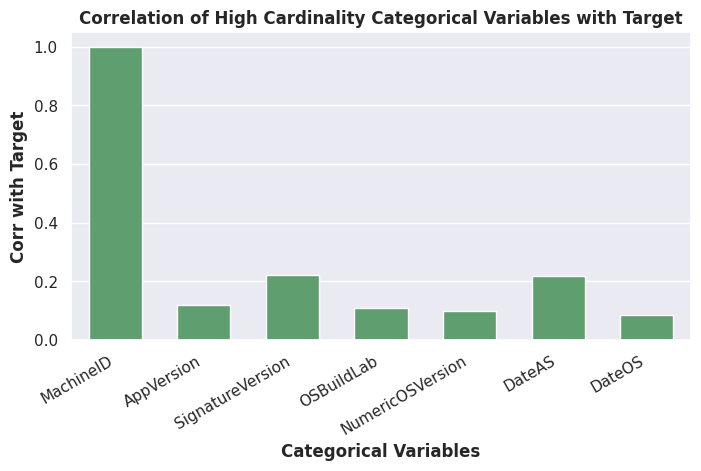

In [31]:
plt.figure(figsize=(8,4))
from scipy.stats import chi2_contingency

def cramer_v(x, y):
    contingency_table = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    r, k = contingency_table.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

association_high = [cramer_v(train[i],train["target"]) for i in high_cardinality]
sns.barplot(x=high_cardinality, y=association_high, color="g", width=0.6)
plt.title("Correlation of High Cardinality Categorical Variables with Target", fontweight="bold")
plt.xlabel("Categorical Variables", fontweight="bold")
plt.ylabel("Corr with Target", fontweight="bold")
plt.xticks(rotation=30, ha='right')
plt.show()

# **Target Variable Distribution 💡**

### 💡💡💡 **Result** : Data is balanced

In [32]:
target_counts = train['target'].value_counts(normalize=True) * 100
print(f"Distribution of target values:\n{target_counts}")

Distribution of target values:
target
1    50.525
0    49.475
Name: proportion, dtype: float64


# **📕 Data Pre-Processing**

In [33]:
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import chi2
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# 📕 **Feature Engineering**

### 1. Converting DateAS and DateOS into Days so that I just have 7 Categories namely Sun till Sat of a week

In [34]:
train['DateAS_day'] = pd.to_datetime(train['DateAS'], format='%Y-%m-%d %H:%M:%S').dt.dayofweek
test['DateAS_day'] = pd.to_datetime(test['DateAS'], format='%Y-%m-%d %H:%M:%S').dt.dayofweek

train['DateOS_day'] = pd.to_datetime(train['DateOS'], format='%Y-%m-%d').dt.dayofweek
test['DateOS_day'] = pd.to_datetime(test['DateOS'], format='%Y-%m-%d').dt.dayofweek

train.drop(['DateAS', 'DateOS'], axis=1, inplace=True)
test.drop(['DateAS', 'DateOS'], axis=1, inplace=True)



In [35]:
x_train = train.drop(["target"], axis=1)
y_train = train['target']
test_x = test.copy()


In [36]:
cat_cols = x_train.select_dtypes(include=['object']).columns
num_cols = x_train.select_dtypes(exclude=['object']).columns

# 📕 **Transformation**

### 1. The columns are categorized for Transformation.
### 2. The columns with more categories are not suitable for OHE as it would result in a very sparse matrix
### 3. The columns that have less categories are suitable for OHE while others were put through Simple Imputer

In [37]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

## **Steps:**

### ✅ **Feature Categorization:** Categorical features are put into low-cardinality, medium-cardinality, and drop groups based on the number of distinct values.

### ✅ **Low-Cardinality Transformer:** Uses SimpleImputer (most frequent strategy) and OneHotEncoder (skips unknowns) for features with fewer than 10 categories.

### ✅ **Medium-Cardinality Transformer:** Uses SimpleImputer and OrdinalEncoder (takes unknowns as -1) for features with between 20 and 3000 unique categories.

### ✅ **Preprocessing Pipeline:** Integrates scaling for numerical, one-hot encoding for low-cardinality, and ordinal encoding for medium-cardinality features.

### ✅ **Data Transformation:**.fit_transform() both trains and applies the pipeline to the training set, while.transform() makes sure that the same thing happens to the test set.

In [38]:
low_cardinality_cols = []
medium_cardinality_cols = []
drop_cols = []

for col in cat_cols:
    num_categories = len(pd.Series(x_train[col]).unique())
    if num_categories < 10:
        low_cardinality_cols.append(col)
    elif 20 <= num_categories <= 3000:
        medium_cardinality_cols.append(col)
    else:
        drop_cols.append(col)

low_cardinality_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

medium_cardinality_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), num_cols),
        
        ('low_card_cat', low_cardinality_transformer, low_cardinality_cols),
        ('medium_card_cat', medium_cardinality_transformer, medium_cardinality_cols)
    ],
    remainder='drop'
)

train_transformed_data = preprocessor.fit_transform(x_train)
test_transformed_data = preprocessor.transform(test_x)


# 📕 **Final Scaling**

### A Final scaling is done for the imputed columns.

In [39]:
minmax_scaler = MinMaxScaler()
final_transformed_data_train = minmax_scaler.fit_transform(train_transformed_data)
final_transformed_data_test = minmax_scaler.fit_transform(test_transformed_data)


# Convert the final transformed data to a DataFrame
transformed_df_train = pd.DataFrame(final_transformed_data_train)
transformed_df_test = pd.DataFrame(final_transformed_data_test)

# View the transformed DataFrame
transformed_df_train.head()

0      1    2         3     4     5    6         7         8         9    \
0  0.0  0.875  0.0  0.758087  0.00  0.25  1.0  0.226244  0.715838  0.328814   
1  0.0  0.875  0.0  0.758087  0.00  0.25  1.0  0.633484  0.671908  0.562712   
2  0.0  0.875  0.0  0.758087  0.00  0.25  1.0  0.226244  0.248598  0.328814   
3  0.0  0.875  0.0  0.658245  0.25  0.25  1.0  0.303167  0.116106  0.932203   
4  0.0  0.875  0.0  0.573831  0.25  0.25  1.0  0.190045  0.701364  0.176271   

        10        11        12   13   14   15        16   17        18   \
0  0.361702  0.668372  0.979167  1.0  0.0  0.0  0.151282  1.0  0.020833   
1  0.801418  0.938103  0.312500  1.0  0.0  0.0  0.251282  1.0  0.020833   
2  0.361702  0.938103  0.979167  1.0  0.0  0.0  0.251282  1.0  0.020833   
3  0.258865  0.734304  0.979167  1.0  0.0  0.0  0.176923  1.0  0.020833   
4  0.145390  0.938103  0.312500  1.0  0.0  0.0  0.251282  1.0  0.020833   

        19        20        21        22        23        24        25   26   \
0  0.085605  0.956684  0.047619  0.444444  0.412737  0.000360  0.000524  0.0   
1  0.435838  0.072951  0.047619  0.444444  0.537207  0.123590  0.142265  1.0   
2  0.496842  0.763517  0.047619  0.444444  0.606927  0.028437  0.032849  1.0   
3  0.341755  0.702194  0.047619  0.444444  0.761341  0.248791  0.283996  0.0   
4  0.435838  0.745107  0.015873  0.444444  0.965140  0.038453  0.006333  0.0   

        27        28        29        30            31        32        33   \
0  0.001957  0.019751  0.054945  0.276836  3.306195e-08  0.552040  0.123164   
1  0.013699  0.103146  0.164835  0.169492  1.000000e+00  0.916390  0.012684   
2  0.029354  0.136796  0.208791  0.220339  1.000000e+00  0.916390  0.015854   
3  0.029354  0.074616  0.132692  0.132203  0.000000e+00  0.641101  0.047285   
4  0.005871  0.107535  0.164835  0.169492  1.000000e+00  0.916390  0.015854   

        34        35   36   37        38        39   40   41   42   43   44   \
0  0.105263  0.133758  0.0  0.0  0.472710  0.303501  0.0  0.0  1.0  0.0  1.0   
1  0.210526  0.184713  0.0  0.0  0.579093  0.617299  1.0  0.0  0.0  0.0  0.0   
2  0.105263  0.133758  0.0  0.0  0.129510  0.129123  0.0  0.0  0.0  0.0  0.0   
3  0.157895  0.159236  0.0  0.0  0.510638  0.457677  1.0  0.0  0.0  0.0  0.0   
4  0.947368  0.974522  0.0  0.0  0.579093  0.182062  0.0  0.0  0.0  0.0  0.0   

   45        46        47    48   49   50   51   52   53   54   55   56   57   \
0  0.0  0.357143  0.000000  0.25  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0   
1  0.0  0.642857  0.500000  0.25  0.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0   
2  1.0  0.357143  0.500000  0.25  0.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0   
3  0.0  0.785714  0.666667  0.50  0.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0   
4  1.0  0.428571  0.833333  0.25  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0   

   58   59   60   61   62   63   64   65   66   67   68   69   70   71   72   \
0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
2  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
3  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0   
4  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   

   73   74   75   76   77   78   79   80   81   82   83   84   85   86   87   \
0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0   

   88   89   90   91   92   93   94   95   96   97   98   99   100  101  102  \
0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
1  0.0  1.0  0.0  0.0  0.0  0.0

# **Just a Sanity Check**

In [40]:
print("Shape of transformed_df_train:", transformed_df_train.shape)
print("Shape of y_train:", y_train.shape)


Shape of transformed_df_train: (100000, 139)
Shape of y_train: (100000,)


# 📕 **Train Test Split**

In [41]:
from sklearn.model_selection import train_test_split

x_train_new,x_test_new, y_train_new, y_test_new = train_test_split(transformed_df_train,y_train,
                                                  test_size = 0.2,
                                                  random_state =42,
                                                  stratify=y_train)


# **ML MODELS** 

## ⚡ **LOGISTIC REGRESSION**

In [42]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# logreg = LogisticRegression(C=1.0, penalty='l2', solver='saga', max_iter=1000, random_state=42)

# logreg.fit(x_train_new, y_train_new)

# y_pred = logreg.predict(x_test_new)

# accuracy = accuracy_score(y_test_new, y_pred)
# print("Accuracy:", accuracy)
# print("Confusion Matrix:\n", confusion_matrix(y_test_new, y_pred))
# print("Classification Report:\n", classification_report(y_test_new, y_pred))
# y_pred = logreg.predict(x_test_new)
# y_pred_new = logreg.predict(transformed_df_test)


# accuracy4 = accuracy_score(y_test_new, y_pred)
# precision4 = classification_report(y_test_new, y_pred, output_dict=True)['weighted avg']['precision']
# f1_score4 = classification_report(y_test_new, y_pred, output_dict=True)['weighted avg']['f1-score']


## ⚡ **Random Forest Classifier**

In [43]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# # param_grid_rf = {
# #     'n_estimators': [50,100],  
# #     'max_depth': [10,20],  
# #     'min_samples_split': [5],  
# #     'min_samples_leaf': [2,4],  
# #     'max_features': ['auto','sqrt']  
# # }
# param_grid_rf = {
#     'n_estimators': [100],  
#     'max_depth': [40],  
#     'min_samples_split': [6],  
#     'min_samples_leaf': [5], 
#     'max_features': ['sqrt'] 
# }

# rf_model = RandomForestClassifier(random_state=42)

# grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
# grid_search_rf.fit(x_train_new, y_train_new)

# best_rf_model = grid_search_rf.best_estimator_
# print("Best Random Forest Parameters:", grid_search_rf.best_params_)

# y_pred = best_rf_model.predict(x_test_new)
# y_pred_new = best_rf_model.predict(transformed_df_test)


# accuracy3 = accuracy_score(y_test_new, y_pred)
# precision3 = classification_report(y_test_new, y_pred, output_dict=True)['weighted avg']['precision']
# f1_score3 = classification_report(y_test_new, y_pred, output_dict=True)['weighted avg']['f1-score']


## ⚡ **Support Vector Machine**

In [44]:
# from sklearn.svm import SVC
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# # param_grid_svm = {
# #     'C': [0.1, 1, 10, 100],  
# #     'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  
# #     'gamma': ['scale', 'auto'],  
# #     'degree': [3, 4, 5],  
# #     'max_iter': [1000, 1500, 2000]  
# # }
# param_grid_svm = {
#     'C': [10],  
#     'kernel': ['rbf'],  
#     'gamma': ['scale'],  
#     'max_iter': [1000]  
# }
# svm_model = SVC(random_state=42)

# grid_search_svm = GridSearchCV(svm_model, param_grid_svm, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
# grid_search_svm.fit(x_train_new, y_train_new)

# best_svm_model = grid_search_svm.best_estimator_
# print("Best SVM Parameters:", grid_search_svm.best_params_)
# y_pred = best_svm_model.predict(x_test_new)
# y_pred_new = best_svm_model.predict(transformed_df_test)

# accuracy2 = accuracy_score(y_test_new, y_pred)
# precision2 = classification_report(y_test_new, y_pred, output_dict=True)['weighted avg']['precision']
# f1_score2 = classification_report(y_test_new, y_pred, output_dict=True)['weighted avg']['f1-score']

## ⚡ **XGBoost Classifier**

In [45]:
# from xgboost import XGBClassifier
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# # param_grid_xgb = {
# #     'n_estimators': [100, 200],
# #     'learning_rate': [0.01, 0.1],
# #     'max_depth': [3, 6]
# # }
# param_grid_xgb = {
#     'n_estimators': [100],
#     'learning_rate': [0.1],
#     'max_depth': [8],
#     'reg_alpha': [0.1],
#     'reg_lambda': [2]
# }

# xgb_model = XGBClassifier(random_state=42)

# grid_search_xgb = GridSearchCV(xgb_model, param_grid_xgb, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
# grid_search_xgb.fit(x_train_new, y_train_new)

# best_xgb_model = grid_search_xgb.best_estimator_
# print("Best XGBoost Parameters:", grid_search_xgb.best_params_)
# y_pred = best_xgb_model.predict(x_test_new)
# y_pred_new = best_xgb_model.predict(transformed_df_test)

# accuracy1 = accuracy_score(y_test_new, y_pred)
# precision1 = classification_report(y_test_new, y_pred, output_dict=True)['weighted avg']['precision']
# f1_score1 = classification_report(y_test_new, y_pred, output_dict=True)['weighted avg']['f1-score']

## ⚡ **GBoost Classifier**

In [46]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

param_grid_gb = {
    'n_estimators': [100],
    'learning_rate': [0.1],
    'max_depth': [8],
    'min_samples_split': [5],
    'min_samples_leaf': [2]
}

gb_model = GradientBoostingClassifier(random_state=42)

grid_search_gb = GridSearchCV(gb_model, param_grid_gb, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search_gb.fit(x_train_new, y_train_new)

best_gb_model = grid_search_gb.best_estimator_
print("Best Gradient Boosting Parameters:", grid_search_gb.best_params_)
y_pred = best_gb_model.predict(x_test_new)
y_pred_new = best_gb_model.predict(transformed_df_test)

accuracy0 = accuracy_score(y_test_new, y_pred)
precision0 = classification_report(y_test_new, y_pred, output_dict=True)['weighted avg']['precision']
f1_score0 = classification_report(y_test_new, y_pred, output_dict=True)['weighted avg']['f1-score']


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best Gradient Boosting Parameters: {'learning_rate': 0.1, 'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


# 💯 **Models Comparison**



### * Model 4 - Linear Regression
### * Model 3 - RFC
### * Model 2 - SVM
### * Model 1 - XGBoost - Best model
### * Model 0 - GBoost
  


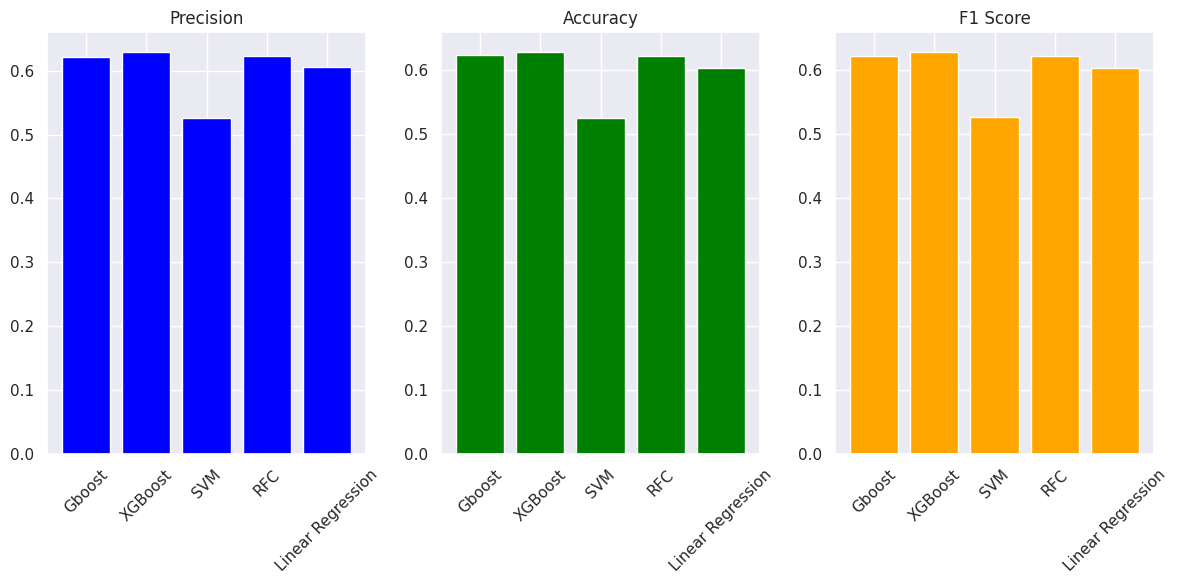

In [47]:
# accuracy = [accuracy0, accuracy1, accuracy2, accuracy3, accuracy4]
accuracy = [0.6237, 0.62805, 0.5261, 0.6221, 0.6041]
# precision = [precision1, precision2, precision3, precision4]
precision = [0.6221797882207182, 0.6286396176745126,0.5259440759134653,0.6225837441771875,0.6050625044280611]
# f1_score = [f1_score1, f1_score2, f1_score3, f1_score4]
f1_score = [0.621023030655627,0.6272187266142245,0.5258178005568199,0.6213174120387128,0.6024841004025516]

models = ['Gboost', 'XGBoost', 'SVM', 'RFC', 'Linear Regression']

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.bar(models, precision, color='blue')
plt.title('Precision')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
plt.bar(models, accuracy, color='green')
plt.title('Accuracy')
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)
plt.bar(models, f1_score, color='orange')
plt.title('F1 Score')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [48]:
submission = pd.DataFrame({"id":range(0,test.shape[0]),"target":y_pred_new})
submission.to_csv("submission.csv",index=False)